# Conclusion

Dataset contains stats accumulated for team vs. a unique team.

XGBoost with kfolds=5, and pruned parameter values found with `RandomizedSearchCV`.

## HOME_TEAM_WINS

Target to beat - 59.1% home winrate

Achieved - **66% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|61%|60%|60%|
|max_depth|66%|64%|64%|
|reg_lambda|60%|59%|58%|
|learning rate|63%|62%|62%|
|gamma|61%|58%|54%|
|scale_pos_weight|60%|58%|56%|

## HOME_HIGHER_FG_PCT

Target to beat - 55.0% rate of home having higher FGP

Achieved - **60% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|56%|56%|55%|
|max_depth|60%|58%|58%|
|reg_lambda|56%|5%|55%|
|learning rate|57%|57%|56%|
|gamma|56%|56%|55%|
|scale_pos_weight|54%|53%|52%|

## HOME_HIGHER_FG3_PCT

Target to beat - 50.8% rate of home having higher FG3

Achieved - **52% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|52%|50%|49%|
|max_depth|51%|50%|49%|
|reg_lambda|52%|51%|49%|
|learning rate|51%|51%|50%|
|gamma|52%|49%|48%|
|scale_pos_weight|51%|50%|49%|

## HOME_HIGHER_FT_PCT

Target to beat - 49.5% rate of home having higher FTP

Achieved - **52% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|51%|51%|50%|
|max_depth|52%|51%|49%|
|reg_lambda|51%|50%|50%|
|learning rate|51%|50%|50%|
|gamma|50%|51%|48%|
|scale_pos_weight|50%|49%|49%|

## HOME_HIGHER_AST

Target to beat - 55.0% rate of home having higher AST

Achieved - **58% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|56%|56%|54%|
|max_depth|58%|58%|57%|
|reg_lambda|56%|55%|55%|
|learning rate|58%|57%|57%|
|gamma|55%|54%|52%|
|scale_pos_weight|56%|53%|51%|

## HOME_HIGHER_REB

Target to beat - 53.4% rate of home having higher REB

Achieved - **56% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|54%|53%|53%|
|max_depth|56%|55%|54%|
|reg_lambda|53%|53%|52%|
|learning rate|56%|54%|53%|
|gamma|55%|54%|53%|
|scale_pos_weight|53%|52%|52%|


In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

In [3]:
team_v_team_stats_df = Local.get_team_v_team_stats_dataframe('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [4]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [5]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [6]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [7]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [8]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [9]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [10]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [11]:
games_df

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
16157    2003-10-05  10300001    1610612762       1610612742    2003   
16156    2003-10-06  10300002    1610612763       1610612749    2003   
16155    2003-10-07  10300009    1610612758       1610612746    2003   
16154    2003-10-07  10300005    1610612757       1610612745    2003   
16153    2003-10-07  10300007    1610612748       1610612755    2003   
...             ...       ...           ...              ...     ...   
4        2020-12-18  12000040    1610612761       1610612748    2020   
3        2020-12-18  12000039    1610612754       1610612755    2020   
2        2020-12-19  12000049    1610612763       1610612737    2020   
1        2020-12-19  12000048    1610612764       1610612765    2020   
0        2020-12-19  12000047    1610612753       1610612766    2020   

       PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  \
16157      90.0        0.457        0.735         0.143      23.0      41.0   
16156     105.0        0.494        0.618         0.267      25.0      48.0   
16155     101.0        0.467        0.871         0.444      19.0      39.0   
16154     104.0        0.527        0.657         0.429      22.0      33.0   
16153      86.0        0.352        0.647         0.222      15.0      55.0   
...         ...          ...          ...           ...       ...       ...   
4         105.0        0.380        0.737         0.356      27.0      37.0   
3         107.0        0.371        0.692         0.262      19.0      45.0   
2         116.0        0.400        0.744         0.396      21.0      43.0   
1          99.0        0.427        0.625         0.295      24.0      45.0   
0         120.0        0.433        0.792         0.425      23.0      50.0   

       PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  
16157      85.0        0.447        0.500         0.250      20.0      38.0  
16156      94.0        0.427        0.700         0.154      20.0      43.0  
16155      82.0        0.368        0.609         0.364      13.0      50.0  
16154      80.0        0.470        0.667         0.333      10.0      37.0  
16153      79.0        0.329        0.897         0.143       7.0      44.0  
...         ...          ...          ...           ...       ...       ...  
4         117.0        0.534        0.741         0.514      30.0      51.0  
3         113.0        0.533        0.629         0.355      23.0      48.0  
2         117.0        0.422        0.837         0.297      24.0      47.0  
1          96.0        0.402        0.647         0.326      18.0      51.0  
0         117.0        0.444        0.864         0.439      21.0      52.0  

[23520 rows x 17 columns]

In [12]:
cumulative_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23515  2020-12-18  12000040            1    2020                  2   
23516  2020-12-18  12000039            1    2020                  2   
23517  2020-12-19  12000049            1    2020                  3   
23518  2020-12-19  12000048            1    2020                  2   
23519  2020-12-19  12000047            1    2020                  3   

       GAMES_PLAYED_away  PPG_total_home  FG_PCT_total_home  \
0                      0        0.000000           0.000000   
1                      0        0.000000           0.000000   
2                      0        0.000000           0.000000   
3                      0        0.000000           0.000000   
4                      0        0.000000           0.000000   
...                  ...             ...                ...   
23515                  1      111.500000           0.443500   
23516                  1      105.000000           0.438000   
23517                  3      119.333333           0.466667   
23518                  3      100.000000           0.415000   
23519                  3      112.666667           0.444333   

       FG3_PCT_total_home  FT_PCT_total_home  ...  PPG_total_away  \
0                0.000000           0.000000  ...        0.000000   
1                0.000000           0.000000  ...        0.000000   
2                0.000000           0.000000  ...        0.000000   
3                0.000000           0.000000  ...        0.000000   
4                0.000000           0.000000  ...        0.000000   
...                   ...                ...  ...             ...   
23515            0.353000           0.691000  ...       92.000000   
23516            0.383000           0.619000  ...      108.000000   
23517            0.329333           0.704667  ...      111.333333   
23518            0.321500           0.704500  ...       93.333333   
23519            0.305333           0.758000  ...      110.666667   

       FG_PCT_total_away  FG3_PCT_total_away  FT_PCT_total_away  \
0               0.000000            0.000000           0.000000   
1               0.000000            0.000000           0.000000   
2               0.000000            0.000000           0.000000   
3               0.000000            0.000000           0.000000   
4               0.000000            0.000000           0.000000   
...                  ...                 ...                ...   
23515           0.427000            0.283000           0.818000   
23516           0.471000            0.241000           0.750000   
23517           0.392667            0.332333           0.789667   
23518           0.413333            0.333000           0.713000   
23519           0.442333            0.372333           0.751000   

       APG_total_away  RPG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  \
0            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
1            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
2            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
3            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
4            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
...               ...             ...           ...           ...         ...   
23515       26.000000       35.000000  1.610613e+09  1.610613e+09    0.000000   
23516       23.000000       42.000000  1.610613e+09  1.610613e+09    1.000000   
23517       24.000000       56.000000  1

In [13]:
team_v_team_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23511  2020-12-18  12000044            1    2020                  1   
23516  2020-12-18  12000039            1    2020                  0   
23518  2020-12-19  12000048            1    2020                  1   
23517  2020-12-19  12000049            1    2020                  1   
23519  2020-12-19  12000047            1    2020                  1   

       GAMES_PLAYED_away  FG3_PCT_total_home  PPG_total_home  \
0                      0               0.000             0.0   
1                      0               0.000             0.0   
2                      0               0.000             0.0   
3                      0               0.000             0.0   
4                      0               0.000             0.0   
...                  ...                 ...             ...   
23511                  1               0.324           103.0   
23516                  0               0.000             0.0   
23518                  1               0.265            86.0   
23517                  1               0.380           128.0   
23519                  1               0.324           115.0   

       FG_PCT_total_home  RPG_total_home  ...  FG3_PCT_total_away  \
0                  0.000             0.0  ...               0.000   
1                  0.000             0.0  ...               0.000   
2                  0.000             0.0  ...               0.000   
3                  0.000             0.0  ...               0.000   
4                  0.000             0.0  ...               0.000   
...                  ...             ...  ...                 ...   
23511              0.381            46.0  ...               0.333   
23516              0.000             0.0  ...               0.000   
23518              0.397            42.0  ...               0.400   
23517              0.474            58.0  ...               0.289   
23519              0.474            53.0  ...               0.439   

       PPG_total_away  FG_PCT_total_away  RPG_total_away  FT_PCT_total_away  \
0                 0.0              0.000             0.0              0.000   
1                 0.0              0.000             0.0              0.000   
2                 0.0              0.000             0.0              0.000   
3                 0.0              0.000             0.0              0.000   
4                 0.0              0.000             0.0              0.000   
...               ...                ...             ...                ...   
23511           124.0              0.542            61.0              0.643   
23516             0.0              0.000             0.0              0.000   
23518            97.0              0.494            42.0              0.583   
23517           106.0              0.381            46.0              0.864   
23519           123.0              0.475            43.0              0.900   

       APG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  W_PCT_home  
0                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
1                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
2                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
3                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
4                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
...               ...           ...           ...         ...         ...  
23511            26.0  1.610613e+09  1.610613e+09         1.0         0.0  
23516

## Attach target columns to dataset

In [14]:
team_v_team_stats_copy_df = team_v_team_stats_df.copy()
team_v_team_stats_copy_df['home_win'] = winners_df
team_v_team_stats_copy_df['greater_fgp'] = greater_fgp_df
team_v_team_stats_copy_df['greater_fg3'] = greater_fg3_df
team_v_team_stats_copy_df['greater_ft'] = greater_ft_df
team_v_team_stats_copy_df['greater_ast'] = greater_ast_df
team_v_team_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [15]:
team_v_team_stats_copy_df = team_v_team_stats_copy_df[(team_v_team_stats_copy_df['GAMES_PLAYED_home']>0) & (team_v_team_stats_copy_df['GAMES_PLAYED_away']>0)]

# Get new target datasets after row removal
winners_df = team_v_team_stats_copy_df['home_win']
greater_fgp_df = team_v_team_stats_copy_df['greater_fgp']
greater_fg3_df = team_v_team_stats_copy_df['greater_fg3']
greater_ft_df = team_v_team_stats_copy_df['greater_ft']
greater_ast_df = team_v_team_stats_copy_df['greater_ast']
greater_reb_df = team_v_team_stats_copy_df['greater_reb']

## Remove non-data

In [16]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del team_v_team_stats_copy_df[key]

team_v_team_stats_copy_df

FG3_PCT_total_home  PPG_total_home  FG_PCT_total_home  RPG_total_home  \
26                  0.211            78.0              0.329            38.0   
49                  0.000            98.0              0.500            37.0   
44                  0.667            58.0              0.457            31.0   
53                  0.286           104.0              0.493            40.0   
87                  0.250            85.0              0.447            38.0   
...                   ...             ...                ...             ...   
23509               0.310           107.0              0.407            45.0   
23511               0.324           103.0              0.381            46.0   
23518               0.265            86.0              0.397            42.0   
23517               0.380           128.0              0.474            58.0   
23519               0.324           115.0              0.474            53.0   

       FT_PCT_total_home  APG_total_home  FG3_PCT_total_away  PPG_total_away  \
26                 0.737             8.0               0.370            98.0   
49                 0.800            17.0               0.700           105.0   
44                 0.700            10.0               0.300            62.0   
53                 0.700            22.0               0.214            89.0   
87                 0.500            20.0               0.143            90.0   
...                  ...             ...                 ...             ...   
23509              0.800            26.0               0.400           112.0   
23511              0.680            22.0               0.333           124.0   
23518              0.682            18.0               0.400            97.0   
23517              0.773            33.0               0.289           106.0   
23519              0.917            26.0               0.439           123.0   

       FG_PCT_total_away  RPG_total_away  FT_PCT_total_away  APG_total_away  \
26                 0.413            42.0              0.703            22.0   
49                 0.527            39.0              0.714            27.0   
44                 0.385            30.0              0.576            11.0   
53                 0.462            36.0              0.538            21.0   
87                 0.457            41.0              0.735            23.0   
...                  ...             ...                ...             ...   
23509              0.476            47.0              0.750            20.0   
23511              0.542            61.0              0.643            26.0   
23518              0.494            42.0              0.583            20.0   
23517              0.381            46.0              0.864            25.0   
23519              0.475            43.0              0.900            32.0   

       W_PCT_away  W_PCT_home  
26            1.0         0.0  
49            1.0         0.0  
44            1.0         0.0  
53            0.0         1.0  
87            1.0         0.0  
...           ...         ...  
23509         1.0         0.0  
23511         1.0         0.0  
23518         1.0         0.0  
23517         0.0         1.0  
23519         1.0         0.0  

[16034 rows x 14 columns]

## Do hyperparameters searches

In [17]:
from sklearn.metrics import classification_report

In [18]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [19]:
from sklearn.utils.class_weight import compute_sample_weight

In [20]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
#     clf.fit(x, y, sample_weight=compute_sample_weight('balanced',y))
    clf.fit(x, y)
    return clf

## Plot feature importances

In [21]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

In [22]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, y_train_dict, y_test_dict, grid_cv_params):
    scores = []
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
#             GridSearchCV,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        score = cv_clf.best_estimator_.score(X_test_dict[key], y_test_dict[key])
        scores.append(score)
        print('Best XGBoost accuracy (%s): %.2f' % (str(cv_clf.best_params_), score))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')
    return scores

## Build K-folds datasets

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=123)

X_train_dicts = []
X_test_dicts = []
y_train_dicts = []
y_test_dicts = []

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_over, y_over = RandomOverSampler(sampling_strategy='minority').fit_resample(team_v_team_stats_copy_df, target)
    for train, test in kf.split(X_over, y_over):
        X_train_dict = {}
        X_test_dict = {}
        y_train_dict = {}
        y_test_dict = {}
        
        X_train_dict[key], X_test_dict[key] = X_over.iloc[train], X_over.iloc[test]
        y_train_dict[key], y_test_dict[key] = y_over.iloc[train], y_over.iloc[test]
        
        X_train_dicts.append(X_train_dict)
        X_test_dicts.append(X_test_dict)
        y_train_dicts.append(y_train_dict)
        y_test_dicts.append(y_test_dict)

assert len(X_train_dicts)==len(X_test_dicts)==len(y_train_dicts)==len(y_test_dicts)
print(len(X_train_dicts))

30


In [25]:
def print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, params):
    scores=[]
    for i in range(len(X_train_dicts)):
        print(f'i={i}')
        score = print_all_metrics_and_plot(
            xgb.XGBClassifier(random_state=0,eval_metric='logloss'),
            X_train_dicts[i],
            X_test_dicts[i],
            y_train_dicts[i],
            y_test_dicts[i],
            params,
        )
        if (i+1)%5==0:
            scores = pd.DataFrame(np.array(scores))
            print(f'Mean accuracy: {scores.mean()[0]}')
            print(f'Max accuracy: {scores.max()[0]}')
            print(f'Min accuracy: {scores.min()[0]}')
            print('=========================================')
            scores=[]
        else:
            scores += score

## Train w/o pruning

In [26]:
import warnings
warnings.filterwarnings("ignore")

i=0
WINNER:

Best XGBoost accuracy ({}): 0.62
              precision    recall  f1-score   support

           0       0.62      0.63      0.63      1928
           1       0.62      0.61      0.61      1882

    accuracy                           0.62      3810
   macro avg       0.62      0.62      0.62      3810
weighted avg       0.62      0.62      0.62      3810



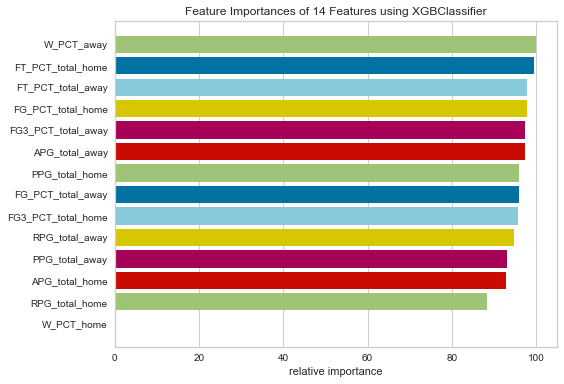

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({}): 0.60
              precision    recall  f1-score   support

           0       0.59      0.63      0.61      1884
           1       0.61      0.58      0.60      1926

    accuracy                           0.60      3810
   macro avg       0.60      0.60      0.60      3810
weighted avg       0.60      0.60      0.60      3810



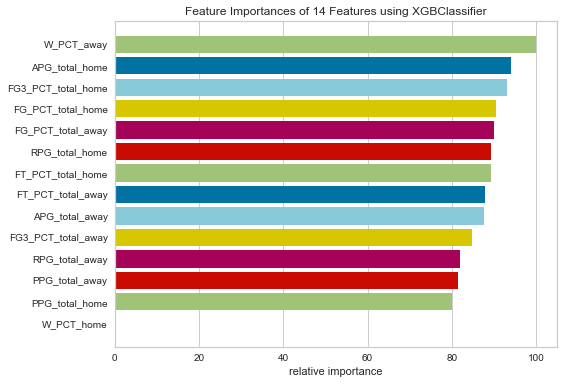

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.63      0.62      1934
           1       0.60      0.58      0.59      1876

    accuracy                           0.60      3810
   macro avg       0.60      0.60      0.60      3810
weighted avg       0.60      0.60      0.60      3810



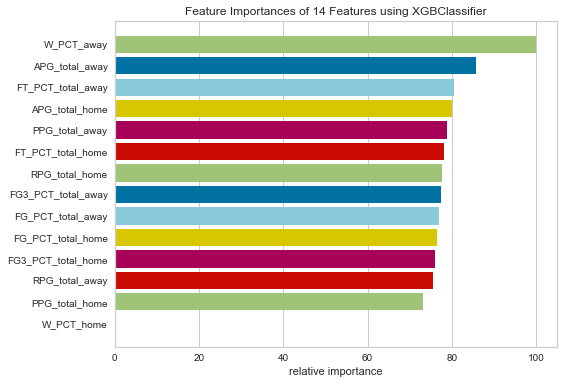

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({}): 0.60
              precision    recall  f1-score   support

           0       0.58      0.64      0.61      1855
           1       0.62      0.57      0.59      1954

    accuracy                           0.60      3809
   macro avg       0.60      0.60      0.60      3809
weighted avg       0.60      0.60      0.60      3809



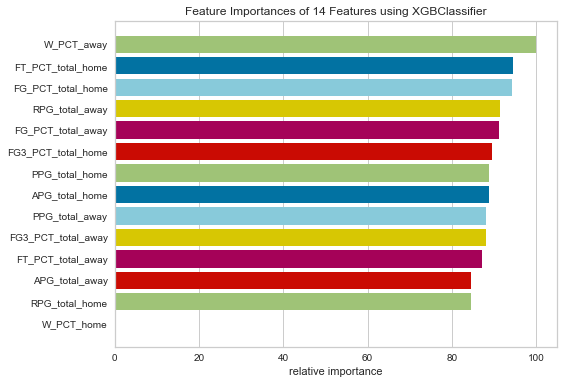

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      1923
           1       0.61      0.59      0.60      1886

    accuracy                           0.61      3809
   macro avg       0.61      0.61      0.61      3809
weighted avg       0.61      0.61      0.61      3809



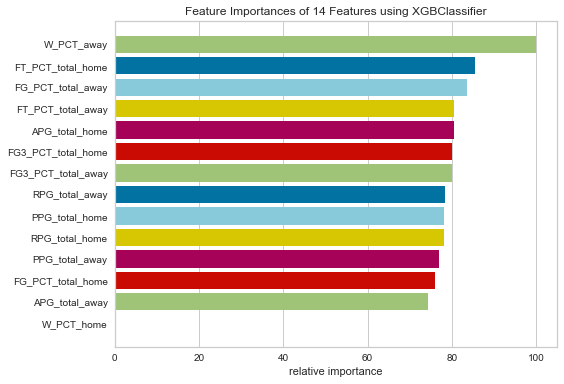

---------------------------------------------
Mean accuracy: 0.6064042959450231
Max accuracy: 0.6186351706036746
Min accuracy: 0.601470202152796
i=5
FGP:

Best XGBoost accuracy ({}): 0.57
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      1777
           1       0.57      0.55      0.56      1777

    accuracy                           0.57      3554
   macro avg       0.57      0.57      0.57      3554
weighted avg       0.57      0.57      0.57      3554



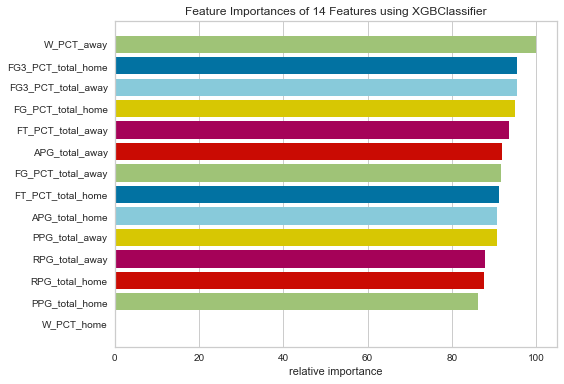

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({}): 0.57
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1795
           1       0.56      0.55      0.56      1759

    accuracy                           0.57      3554
   macro avg       0.57      0.57      0.57      3554
weighted avg       0.57      0.57      0.57      3554



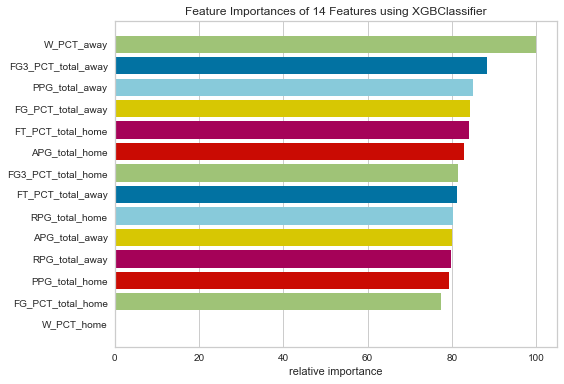

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1785
           1       0.55      0.55      0.55      1769

    accuracy                           0.55      3554
   macro avg       0.55      0.55      0.55      3554
weighted avg       0.55      0.55      0.55      3554



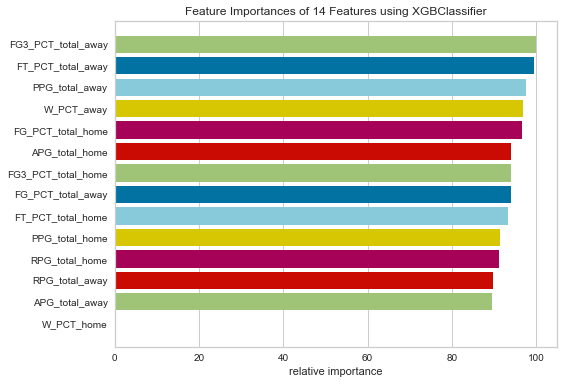

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({}): 0.56
              precision    recall  f1-score   support

           0       0.55      0.58      0.56      1743
           1       0.57      0.54      0.55      1810

    accuracy                           0.56      3553
   macro avg       0.56      0.56      0.56      3553
weighted avg       0.56      0.56      0.56      3553



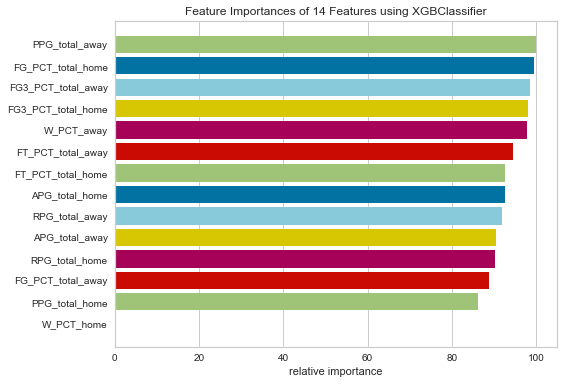

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1784
           1       0.55      0.54      0.55      1769

    accuracy                           0.55      3553
   macro avg       0.55      0.55      0.55      3553
weighted avg       0.55      0.55      0.55      3553



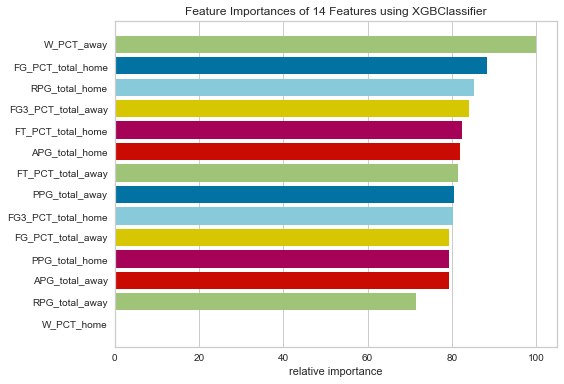

---------------------------------------------
Mean accuracy: 0.5614488996197305
Max accuracy: 0.56809229037704
Min accuracy: 0.5548677546426561
i=10
FG3:

Best XGBoost accuracy ({}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1655
           1       0.49      0.51      0.50      1605

    accuracy                           0.50      3260
   macro avg       0.50      0.50      0.50      3260
weighted avg       0.50      0.50      0.50      3260



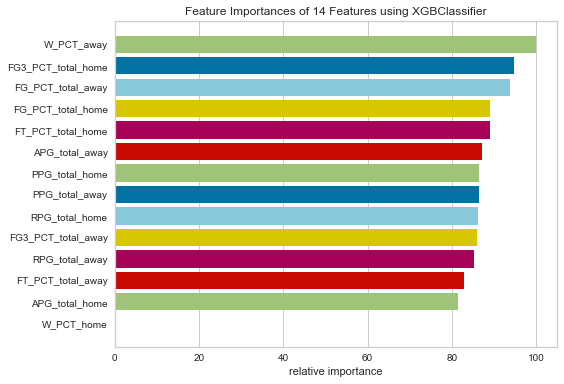

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({}): 0.50
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      1581
           1       0.52      0.50      0.51      1678

    accuracy                           0.50      3259
   macro avg       0.50      0.50      0.50      3259
weighted avg       0.50      0.50      0.50      3259



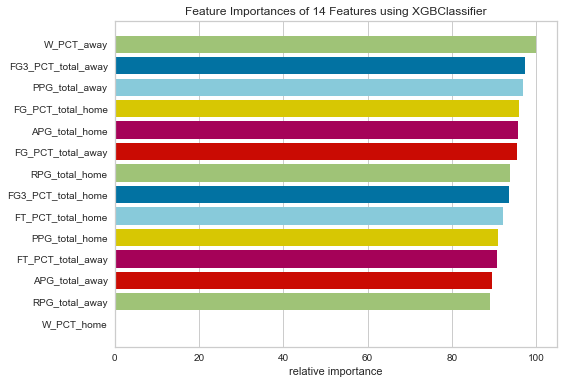

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.52      0.53      1667
           1       0.51      0.53      0.52      1592

    accuracy                           0.52      3259
   macro avg       0.52      0.52      0.52      3259
weighted avg       0.52      0.52      0.52      3259



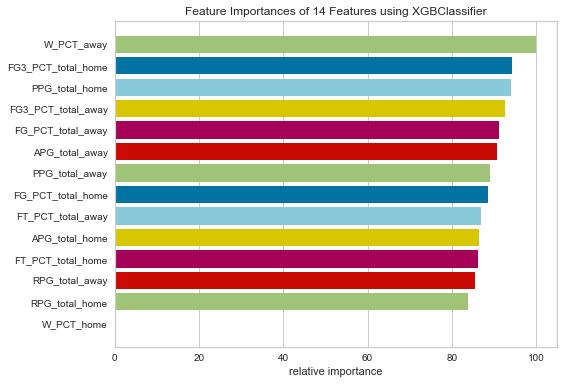

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      1618
           1       0.50      0.49      0.50      1641

    accuracy                           0.50      3259
   macro avg       0.50      0.50      0.50      3259
weighted avg       0.50      0.50      0.50      3259



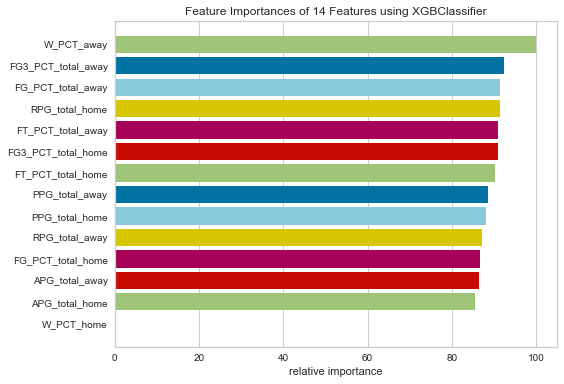

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1627
           1       0.50      0.48      0.49      1632

    accuracy                           0.50      3259
   macro avg       0.50      0.50      0.50      3259
weighted avg       0.50      0.50      0.50      3259



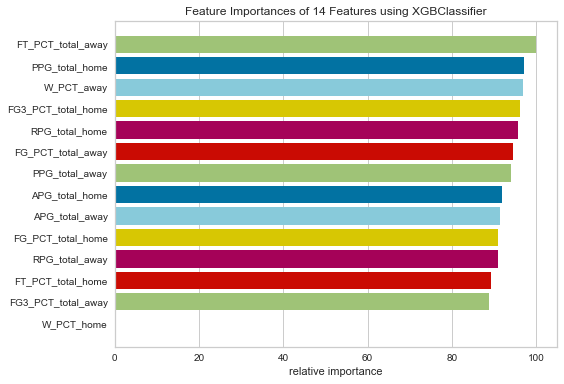

---------------------------------------------
Mean accuracy: 0.5067887040512634
Max accuracy: 0.523166615526235
Min accuracy: 0.49861920834611845
i=15
FT:

Best XGBoost accuracy ({}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.51      0.51      1654
           1       0.50      0.51      0.51      1585

    accuracy                           0.51      3239
   macro avg       0.51      0.51      0.51      3239
weighted avg       0.51      0.51      0.51      3239



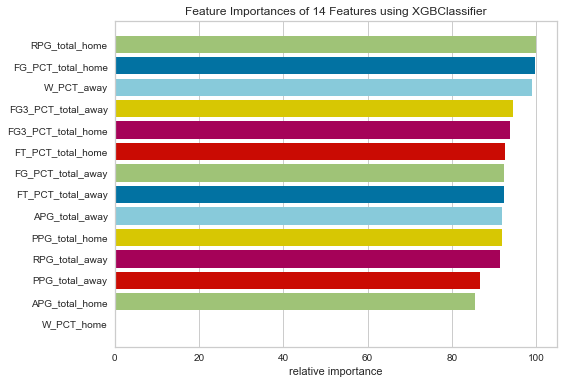

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      1604
           1       0.51      0.49      0.50      1635

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.50      3239
weighted avg       0.50      0.50      0.50      3239



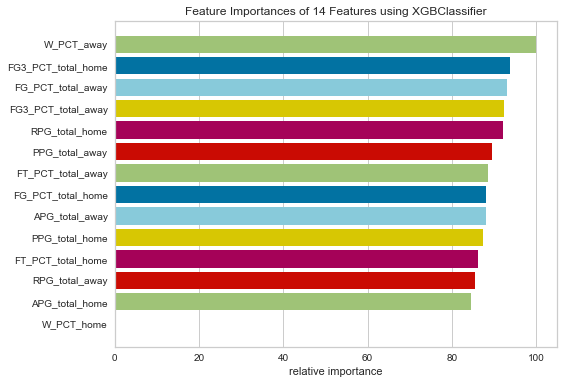

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1647
           1       0.50      0.51      0.51      1591

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.51      3238
weighted avg       0.51      0.51      0.51      3238



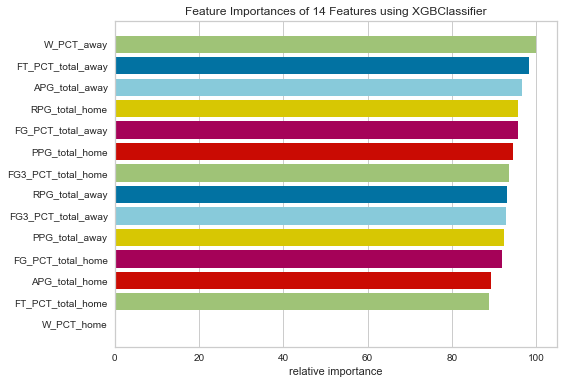

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.50      0.51      1625
           1       0.51      0.53      0.52      1613

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.51      3238
weighted avg       0.51      0.51      0.51      3238



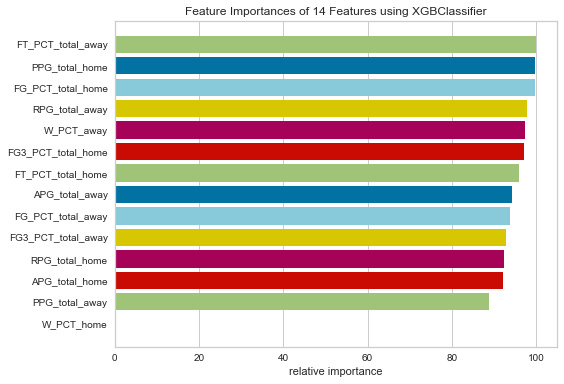

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({}): 0.52
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1566
           1       0.54      0.52      0.53      1672

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



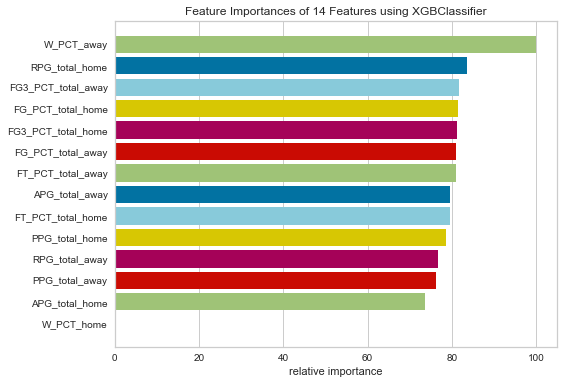

---------------------------------------------
Mean accuracy: 0.510190403553358
Max accuracy: 0.5145151327980235
Min accuracy: 0.5035504785427601
i=20
AST:

Best XGBoost accuracy ({}): 0.56
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      1810
           1       0.55      0.54      0.55      1706

    accuracy                           0.56      3516
   macro avg       0.56      0.56      0.56      3516
weighted avg       0.56      0.56      0.56      3516



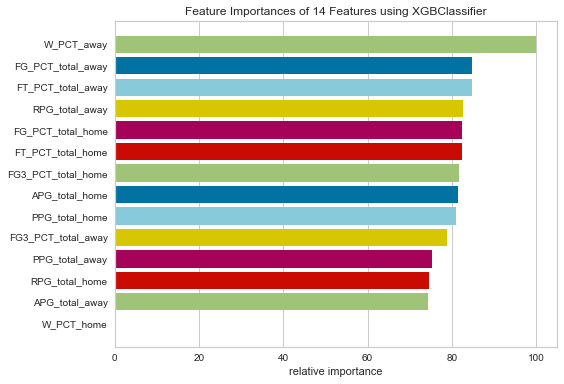

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({}): 0.57
              precision    recall  f1-score   support

           0       0.58      0.56      0.57      1793
           1       0.56      0.58      0.57      1722

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.57      0.57      0.57      3515



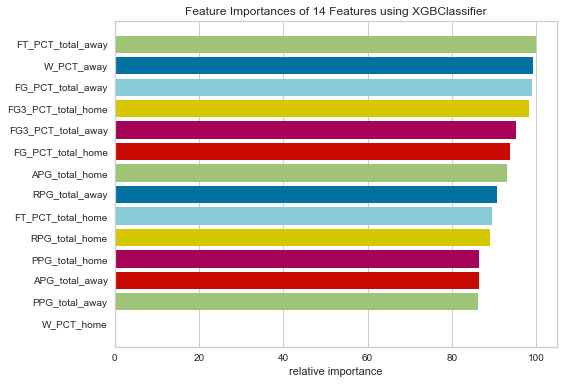

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.57      0.57      1750
           1       0.57      0.56      0.56      1765

    accuracy                           0.56      3515
   macro avg       0.56      0.56      0.56      3515
weighted avg       0.56      0.56      0.56      3515



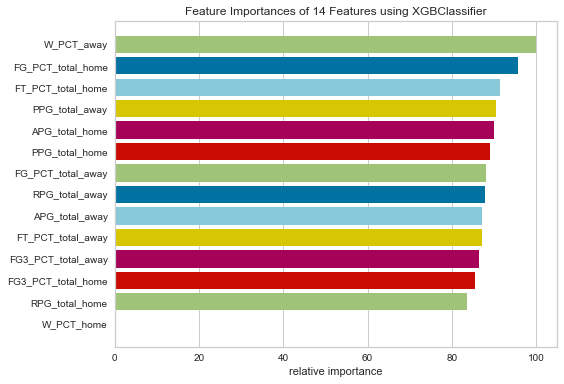

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({}): 0.55
              precision    recall  f1-score   support

           0       0.53      0.58      0.55      1720
           1       0.56      0.52      0.54      1795

    accuracy                           0.55      3515
   macro avg       0.55      0.55      0.55      3515
weighted avg       0.55      0.55      0.55      3515



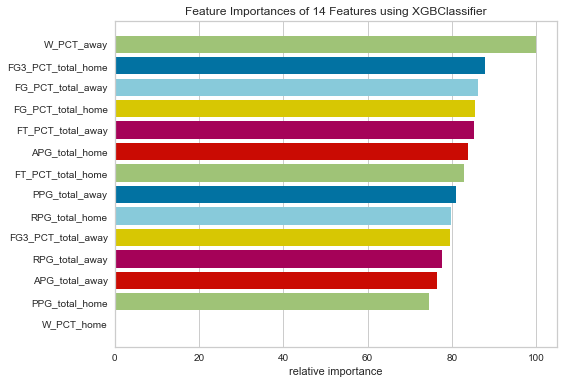

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({}): 0.56
              precision    recall  f1-score   support

           0       0.54      0.58      0.56      1715
           1       0.57      0.53      0.55      1800

    accuracy                           0.56      3515
   macro avg       0.56      0.56      0.56      3515
weighted avg       0.56      0.56      0.56      3515



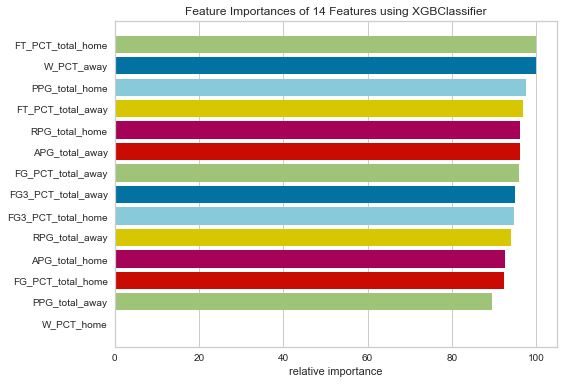

---------------------------------------------
Mean accuracy: 0.5607706772696892
Max accuracy: 0.5695590327169274
Min accuracy: 0.5459459459459459
i=25
REB:

Best XGBoost accuracy ({}): 0.54
              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1739
           1       0.54      0.53      0.53      1682

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



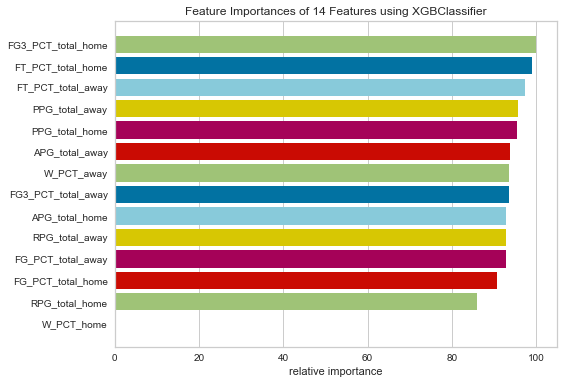

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.53      0.54      1725
           1       0.53      0.54      0.54      1696

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



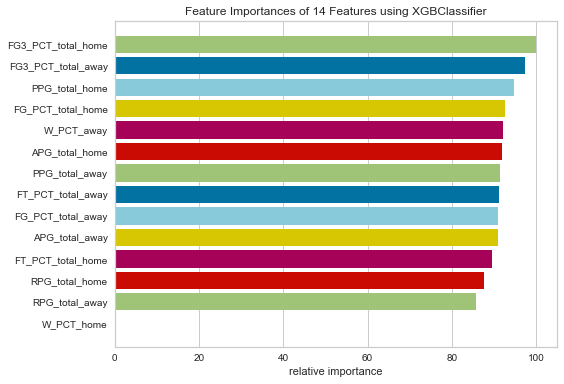

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.55      0.54      1710
           1       0.54      0.54      0.54      1711

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



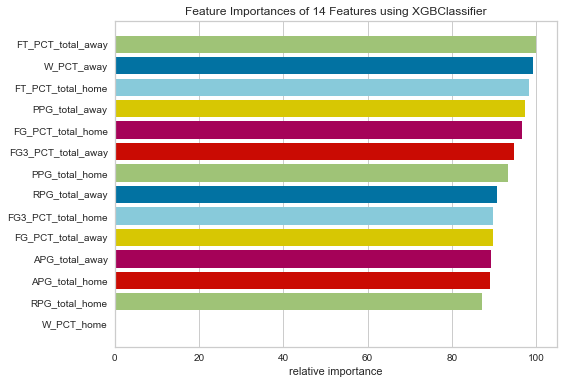

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({}): 0.53
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      1668
           1       0.55      0.52      0.53      1753

    accuracy                           0.53      3421
   macro avg       0.53      0.53      0.53      3421
weighted avg       0.53      0.53      0.53      3421



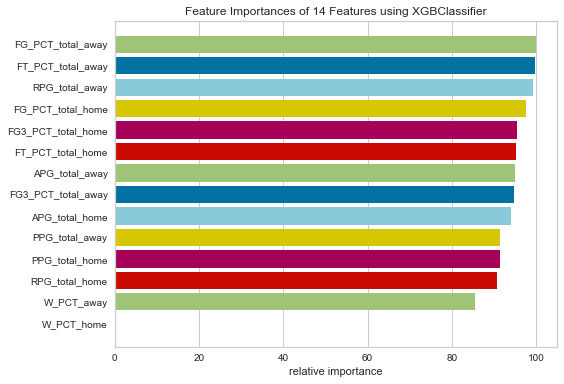

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.55      0.55      1710
           1       0.54      0.53      0.54      1710

    accuracy                           0.54      3420
   macro avg       0.54      0.54      0.54      3420
weighted avg       0.54      0.54      0.54      3420



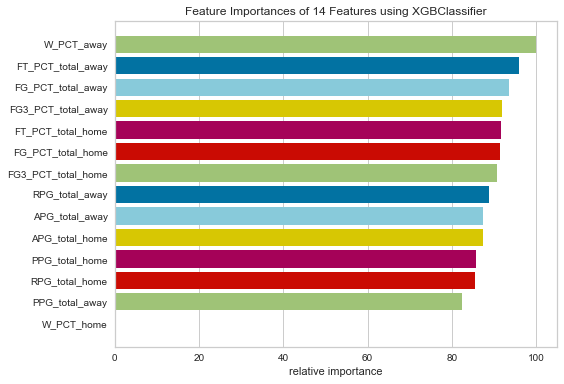

---------------------------------------------
Mean accuracy: 0.5388044431452792
Max accuracy: 0.5428237357497807
Min accuracy: 0.532300496930722


In [27]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {})

In [28]:
# plt.figure(figsize=(15,10))
# t = plot_tree(decision_tree_clf)

## Try prune max depth

i=0
WINNER:

Best XGBoost accuracy ({'max_depth': 14}): 0.64
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1928
           1       0.63      0.65      0.64      1882

    accuracy                           0.64      3810
   macro avg       0.64      0.64      0.64      3810
weighted avg       0.64      0.64      0.64      3810



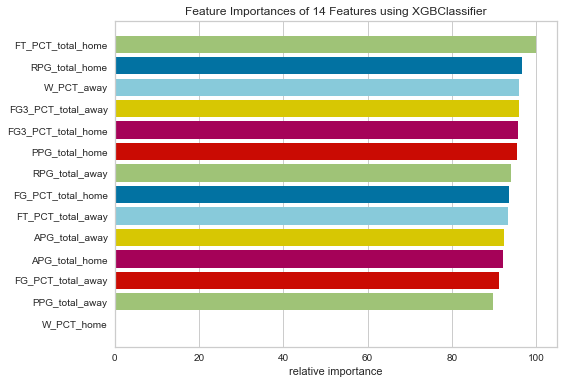

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'max_depth': 16}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      1884
           1       0.65      0.64      0.65      1926

    accuracy                           0.65      3810
   macro avg       0.65      0.65      0.65      3810
weighted avg       0.65      0.65      0.65      3810



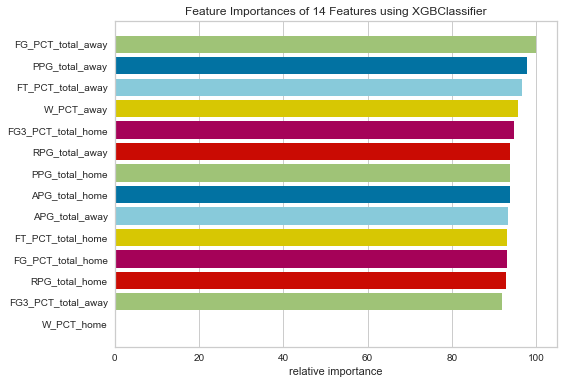

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'max_depth': 22}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      1934
           1       0.65      0.67      0.66      1876

    accuracy                           0.66      3810
   macro avg       0.66      0.66      0.66      3810
weighted avg       0.66      0.66      0.66      3810



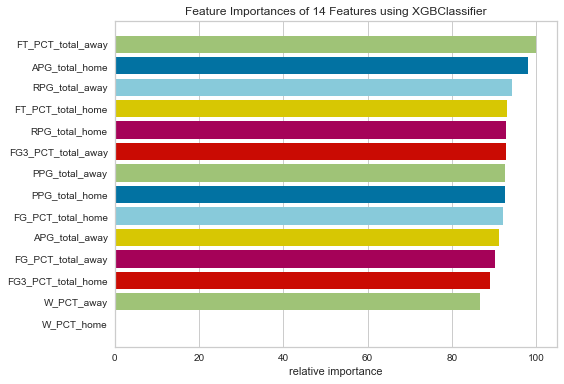

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'max_depth': 15}): 0.65
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      1855
           1       0.66      0.63      0.65      1954

    accuracy                           0.65      3809
   macro avg       0.65      0.65      0.65      3809
weighted avg       0.65      0.65      0.65      3809



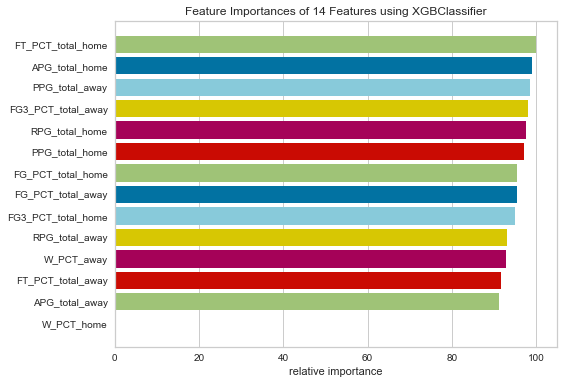

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'max_depth': 25}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1923
           1       0.65      0.66      0.65      1886

    accuracy                           0.66      3809
   macro avg       0.66      0.66      0.66      3809
weighted avg       0.66      0.66      0.66      3809



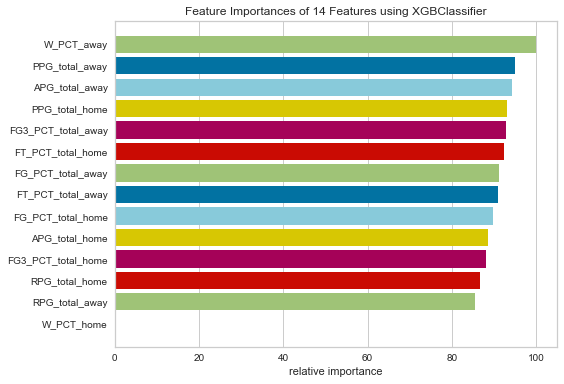

---------------------------------------------
Mean accuracy: 0.6484019406999171
Max accuracy: 0.6608923884514436
Min accuracy: 0.6412073490813648
i=5
FGP:

Best XGBoost accuracy ({'max_depth': 10}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.59      0.59      1777
           1       0.58      0.57      0.58      1777

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



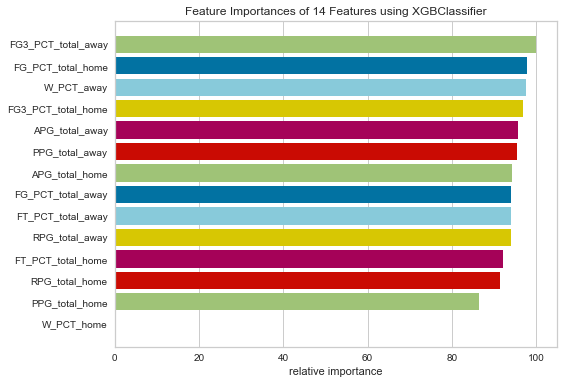

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'max_depth': 11}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.58      0.59      1795
           1       0.58      0.59      0.58      1759

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



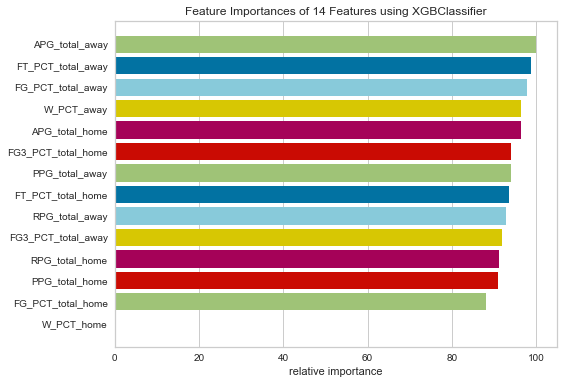

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'max_depth': 18}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      1785
           1       0.61      0.60      0.61      1769

    accuracy                           0.61      3554
   macro avg       0.61      0.61      0.61      3554
weighted avg       0.61      0.61      0.61      3554



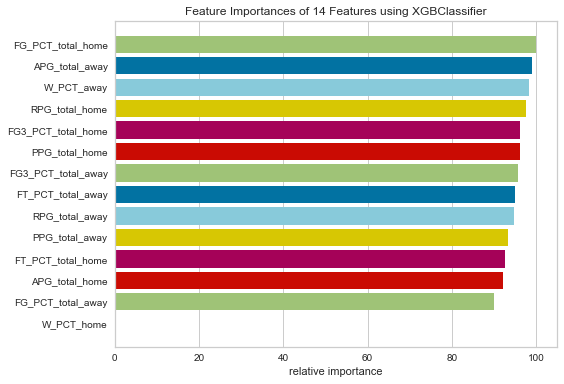

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'max_depth': 13}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      1743
           1       0.59      0.58      0.59      1810

    accuracy                           0.58      3553
   macro avg       0.58      0.58      0.58      3553
weighted avg       0.58      0.58      0.58      3553



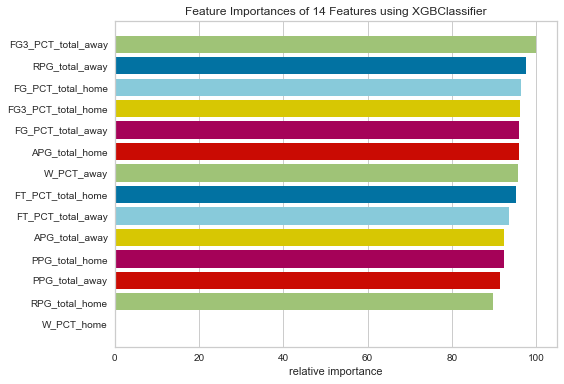

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'max_depth': 21}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.59      0.59      1784
           1       0.59      0.60      0.59      1769

    accuracy                           0.59      3553
   macro avg       0.59      0.59      0.59      3553
weighted avg       0.59      0.59      0.59      3553



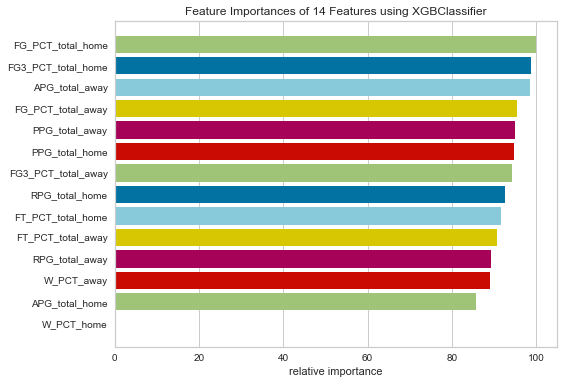

---------------------------------------------
Mean accuracy: 0.5893769617121929
Max accuracy: 0.608610016882386
Min accuracy: 0.5813168261114238
i=10
FG3:

Best XGBoost accuracy ({'max_depth': 28}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1655
           1       0.49      0.51      0.50      1605

    accuracy                           0.50      3260
   macro avg       0.50      0.50      0.50      3260
weighted avg       0.50      0.50      0.50      3260



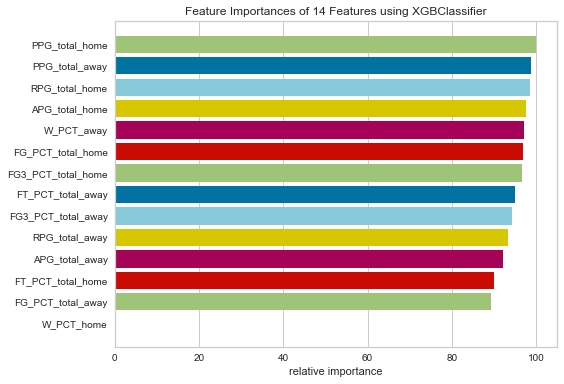

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'max_depth': 8}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1581
           1       0.53      0.50      0.52      1678

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



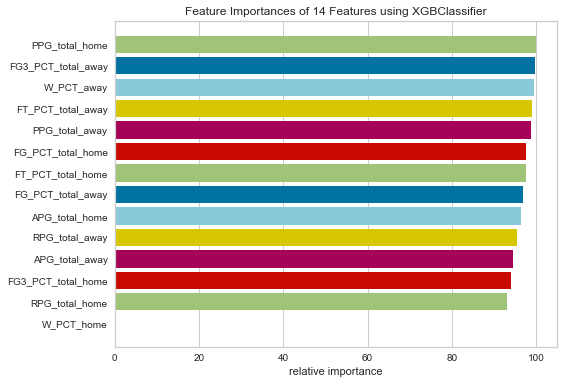

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'max_depth': 29}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1667
           1       0.50      0.51      0.50      1592

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



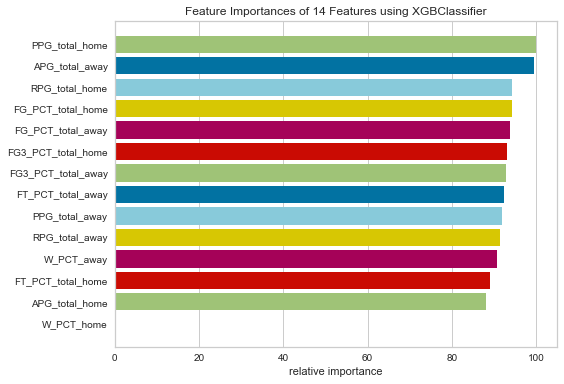

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'max_depth': 29}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1618
           1       0.51      0.51      0.51      1641

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



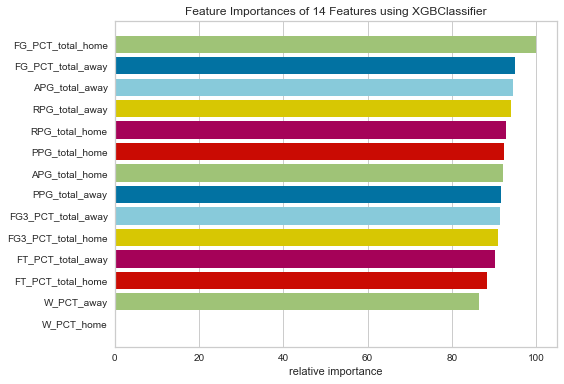

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'max_depth': 5}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1627
           1       0.51      0.51      0.51      1632

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



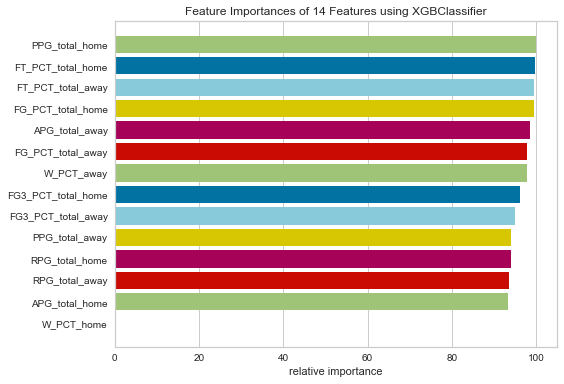

---------------------------------------------
Mean accuracy: 0.5073259138920629
Max accuracy: 0.5133476526541884
Min accuracy: 0.49938650306748467
i=15
FT:

Best XGBoost accuracy ({'max_depth': 21}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.52      0.52      1654
           1       0.51      0.51      0.51      1585

    accuracy                           0.52      3239
   macro avg       0.52      0.52      0.52      3239
weighted avg       0.52      0.52      0.52      3239



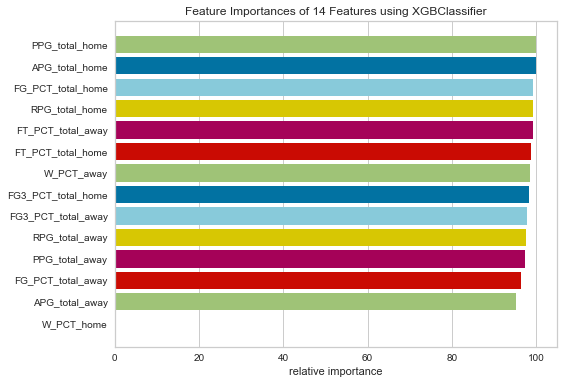

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'max_depth': 26}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1604
           1       0.50      0.50      0.50      1635

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.50      3239
weighted avg       0.50      0.50      0.50      3239



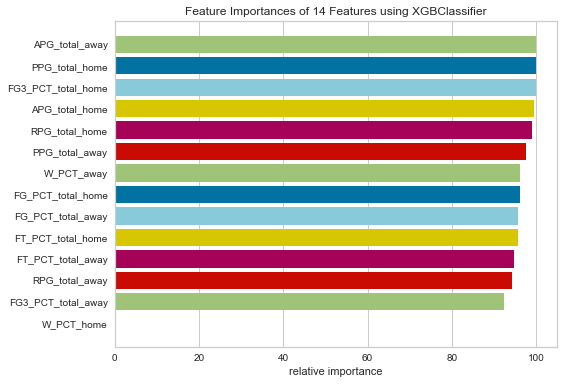

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'max_depth': 7}): 0.53
              precision    recall  f1-score   support

           0       0.53      0.52      0.53      1647
           1       0.52      0.53      0.52      1591

    accuracy                           0.53      3238
   macro avg       0.53      0.53      0.53      3238
weighted avg       0.53      0.53      0.53      3238



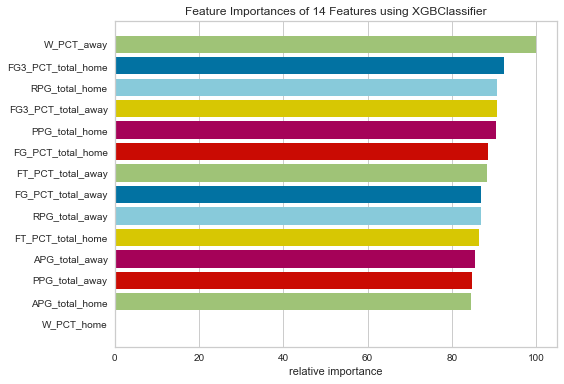

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'max_depth': 26}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1625
           1       0.50      0.52      0.51      1613

    accuracy                           0.50      3238
   macro avg       0.50      0.50      0.50      3238
weighted avg       0.50      0.50      0.50      3238



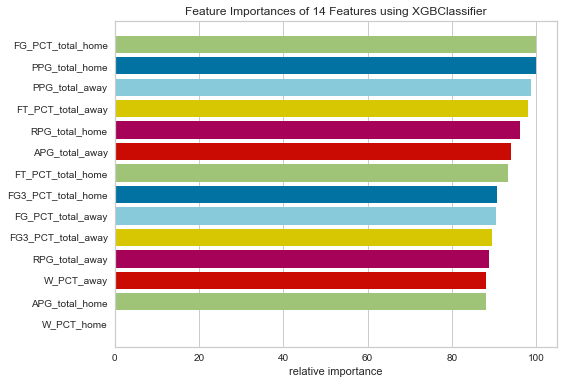

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'max_depth': 9}): 0.49
              precision    recall  f1-score   support

           0       0.48      0.51      0.49      1566
           1       0.51      0.48      0.49      1672

    accuracy                           0.49      3238
   macro avg       0.49      0.49      0.49      3238
weighted avg       0.49      0.49      0.49      3238



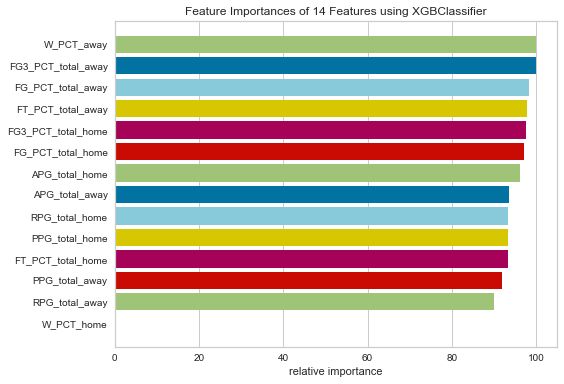

---------------------------------------------
Mean accuracy: 0.5113483113177666
Max accuracy: 0.5253242742433601
Min accuracy: 0.4998456313677061
i=20
AST:

Best XGBoost accuracy ({'max_depth': 12}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1810
           1       0.58      0.57      0.58      1706

    accuracy                           0.59      3516
   macro avg       0.59      0.59      0.59      3516
weighted avg       0.59      0.59      0.59      3516



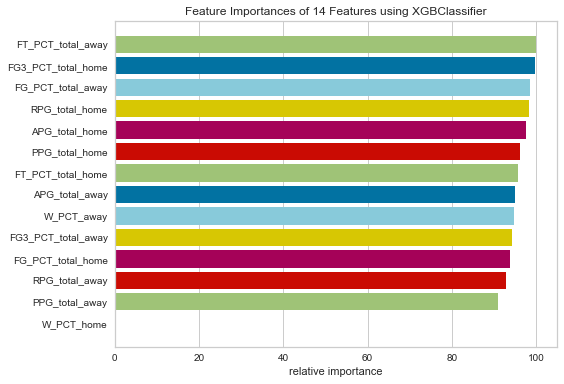

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'max_depth': 21}): 0.58
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1793
           1       0.57      0.61      0.59      1722

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



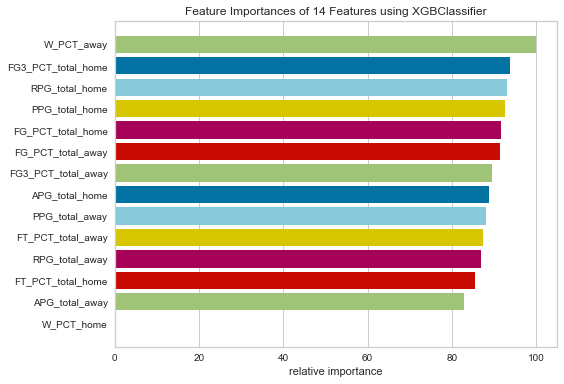

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'max_depth': 13}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      1750
           1       0.59      0.59      0.59      1765

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



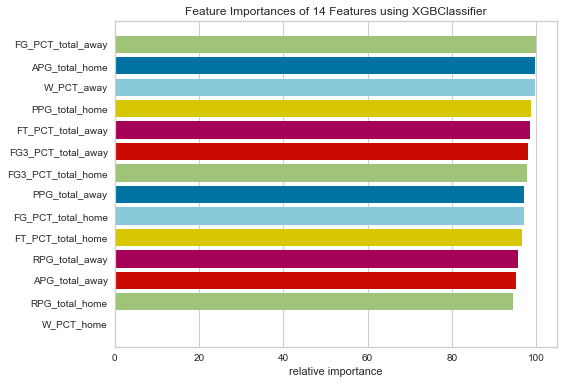

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'max_depth': 11}): 0.58
              precision    recall  f1-score   support

           0       0.56      0.60      0.58      1720
           1       0.59      0.55      0.57      1795

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



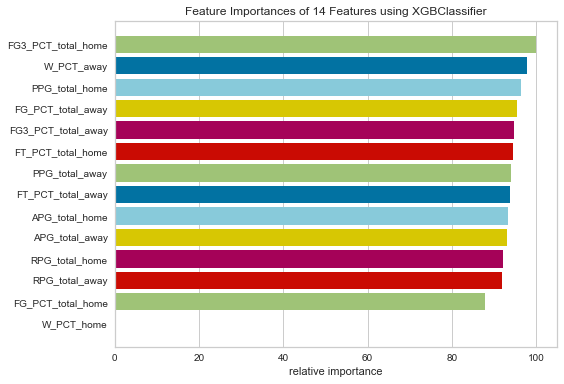

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'max_depth': 12}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      1715
           1       0.59      0.57      0.58      1800

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



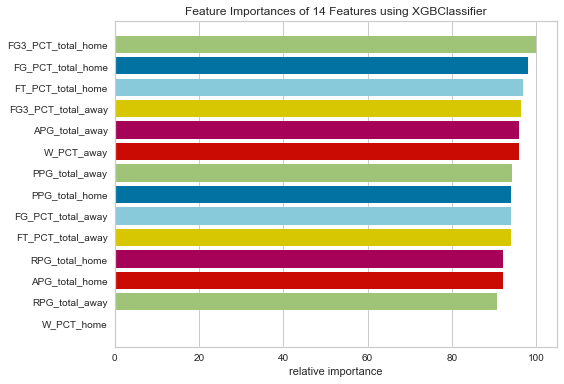

---------------------------------------------
Mean accuracy: 0.58295956950304
Max accuracy: 0.588452787258248
Min accuracy: 0.5769559032716928
i=25
REB:

Best XGBoost accuracy ({'max_depth': 15}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.55      0.56      1739
           1       0.54      0.55      0.54      1682

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



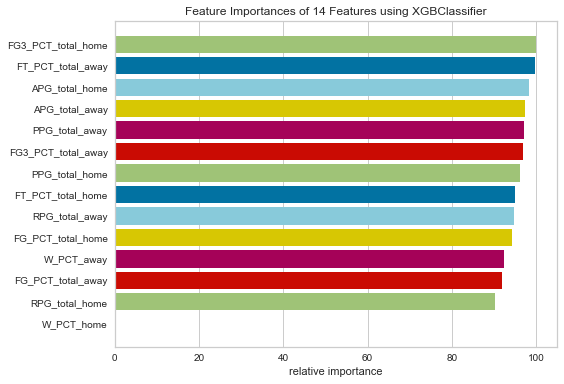

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'max_depth': 18}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.55      0.56      1725
           1       0.56      0.57      0.56      1696

    accuracy                           0.56      3421
   macro avg       0.56      0.56      0.56      3421
weighted avg       0.56      0.56      0.56      3421



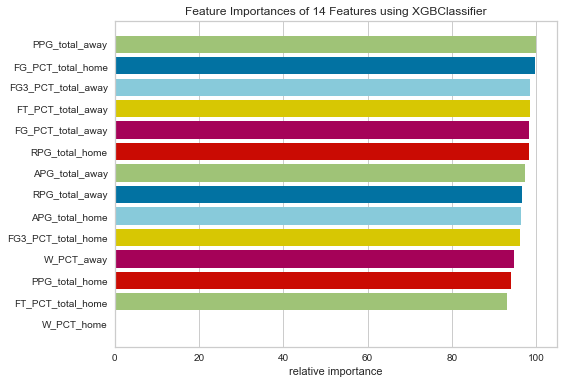

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'max_depth': 12}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.56      0.55      1710
           1       0.55      0.54      0.54      1711

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



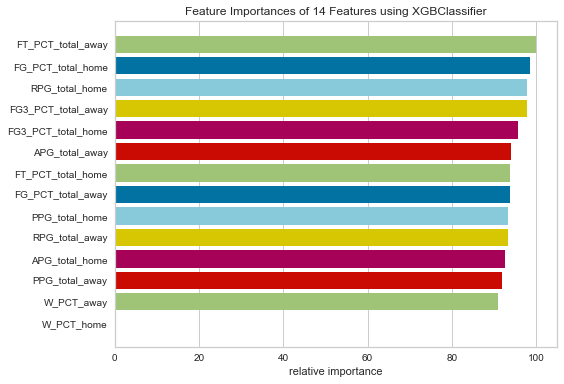

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'max_depth': 8}): 0.54
              precision    recall  f1-score   support

           0       0.53      0.58      0.55      1668
           1       0.56      0.51      0.54      1753

    accuracy                           0.54      3421
   macro avg       0.55      0.55      0.54      3421
weighted avg       0.55      0.54      0.54      3421



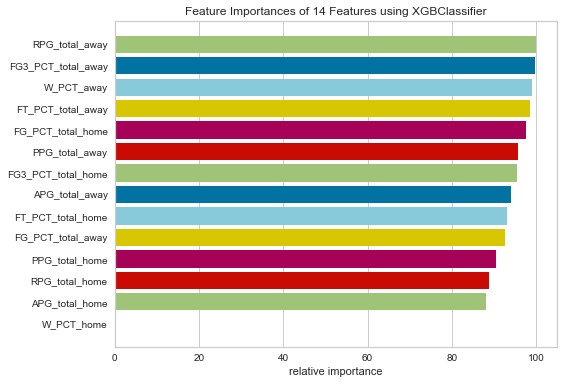

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'max_depth': 14}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1710
           1       0.56      0.57      0.57      1710

    accuracy                           0.56      3420
   macro avg       0.56      0.56      0.56      3420
weighted avg       0.56      0.56      0.56      3420



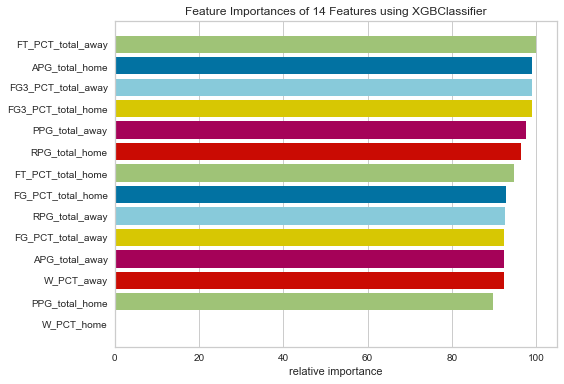

---------------------------------------------
Mean accuracy: 0.5504969307220111
Max accuracy: 0.5600701549254604
Min accuracy: 0.5445776088862906


In [29]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_depth': [*range(3,30)],
})

## Try prune reg_lambda

i=0
WINNER:

Best XGBoost accuracy ({'reg_lambda': 0.7}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      1928
           1       0.60      0.58      0.59      1882

    accuracy                           0.60      3810
   macro avg       0.60      0.60      0.60      3810
weighted avg       0.60      0.60      0.60      3810



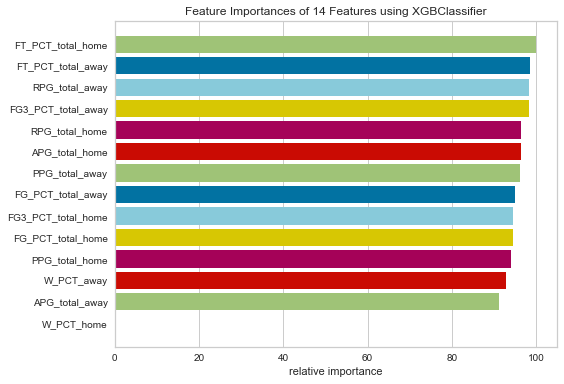

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'reg_lambda': 0.25}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1884
           1       0.60      0.55      0.58      1926

    accuracy                           0.59      3810
   macro avg       0.59      0.59      0.59      3810
weighted avg       0.59      0.59      0.59      3810



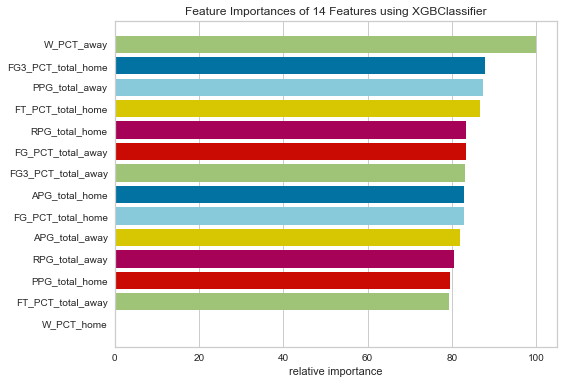

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'reg_lambda': 0.5}): 0.61
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      1934
           1       0.60      0.60      0.60      1876

    accuracy                           0.61      3810
   macro avg       0.61      0.61      0.61      3810
weighted avg       0.61      0.61      0.61      3810



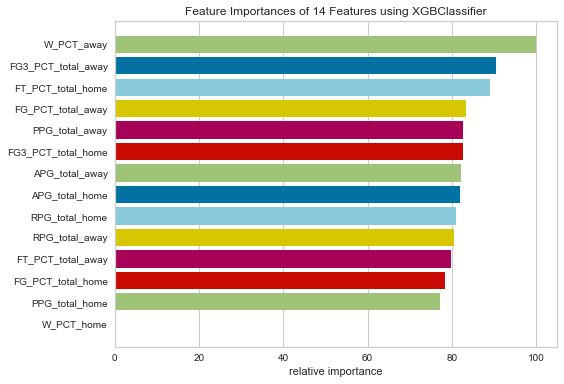

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'reg_lambda': 0.05}): 0.60
              precision    recall  f1-score   support

           0       0.59      0.63      0.61      1855
           1       0.62      0.58      0.60      1954

    accuracy                           0.60      3809
   macro avg       0.60      0.60      0.60      3809
weighted avg       0.61      0.60      0.60      3809



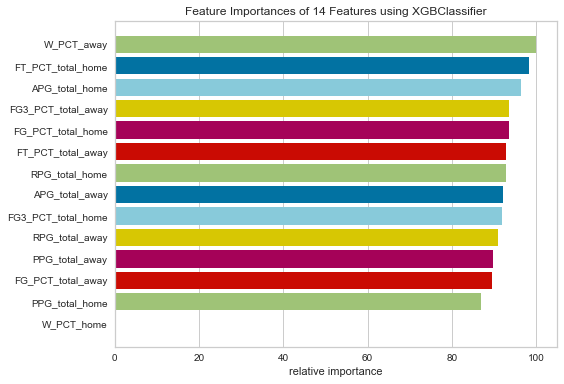

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'reg_lambda': 0.1}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      1923
           1       0.60      0.59      0.59      1886

    accuracy                           0.60      3809
   macro avg       0.60      0.60      0.60      3809
weighted avg       0.60      0.60      0.60      3809



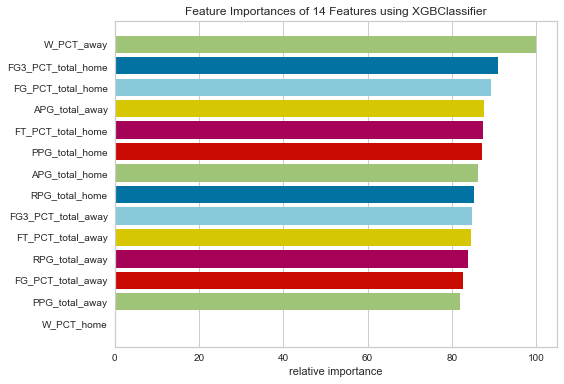

---------------------------------------------
Mean accuracy: 0.598858502000718
Max accuracy: 0.6062992125984252
Min accuracy: 0.5874015748031496
i=5
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.05}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.57      0.56      1777
           1       0.56      0.55      0.55      1777

    accuracy                           0.56      3554
   macro avg       0.56      0.56      0.56      3554
weighted avg       0.56      0.56      0.56      3554



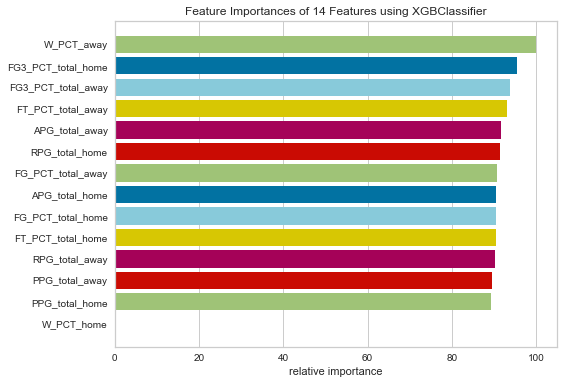

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.2}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1795
           1       0.56      0.55      0.55      1759

    accuracy                           0.56      3554
   macro avg       0.56      0.56      0.56      3554
weighted avg       0.56      0.56      0.56      3554



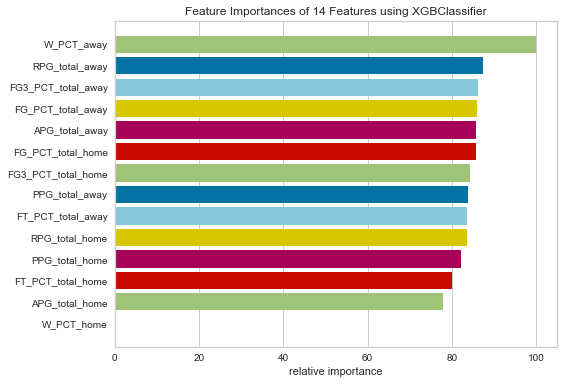

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.75}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1785
           1       0.56      0.56      0.56      1769

    accuracy                           0.56      3554
   macro avg       0.56      0.56      0.56      3554
weighted avg       0.56      0.56      0.56      3554



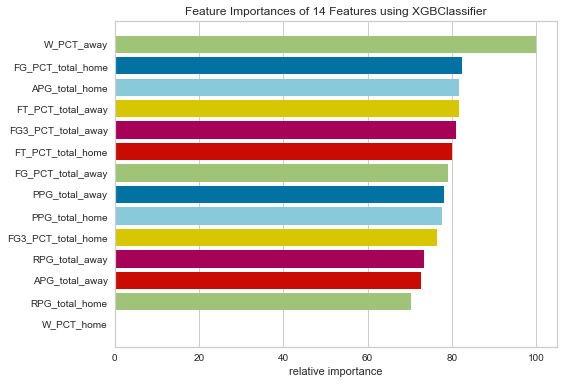

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.4}): 0.56
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1743
           1       0.58      0.54      0.56      1810

    accuracy                           0.56      3553
   macro avg       0.56      0.56      0.56      3553
weighted avg       0.56      0.56      0.56      3553



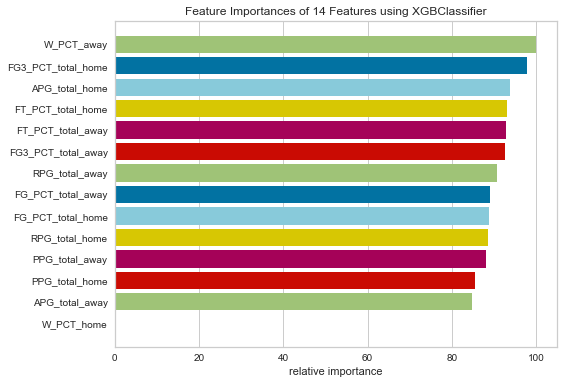

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.4}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.59      0.58      1784
           1       0.57      0.53      0.55      1769

    accuracy                           0.56      3553
   macro avg       0.56      0.56      0.56      3553
weighted avg       0.56      0.56      0.56      3553



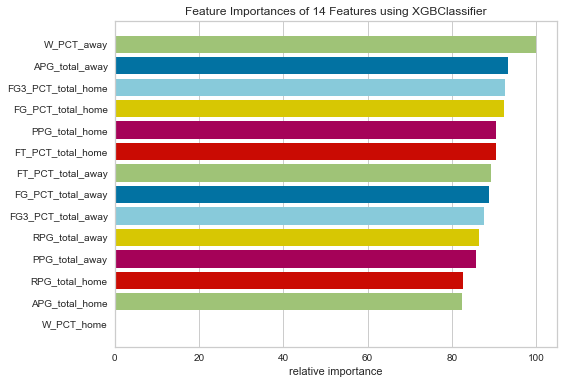

---------------------------------------------
Mean accuracy: 0.5615900019338956
Max accuracy: 0.5634674922600619
Min accuracy: 0.5590883511536298
i=10
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.0}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1655
           1       0.49      0.52      0.51      1605

    accuracy                           0.50      3260
   macro avg       0.50      0.50      0.50      3260
weighted avg       0.50      0.50      0.50      3260



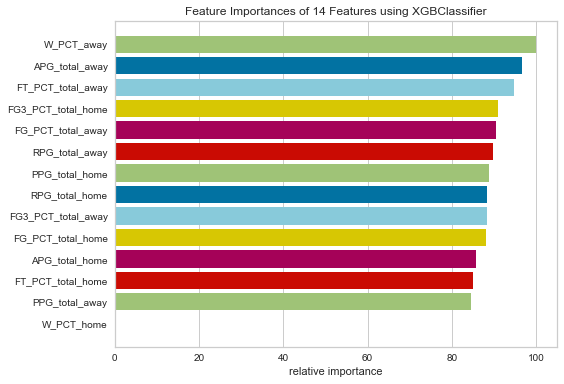

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.0}): 0.52
              precision    recall  f1-score   support

           0       0.51      0.56      0.53      1581
           1       0.54      0.48      0.51      1678

    accuracy                           0.52      3259
   macro avg       0.52      0.52      0.52      3259
weighted avg       0.52      0.52      0.52      3259



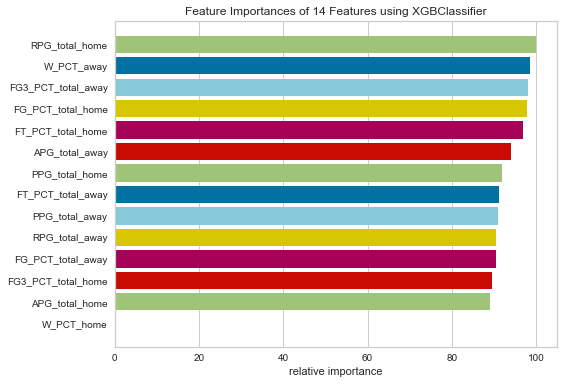

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.7}): 0.53
              precision    recall  f1-score   support

           0       0.54      0.53      0.54      1667
           1       0.52      0.52      0.52      1592

    accuracy                           0.53      3259
   macro avg       0.53      0.53      0.53      3259
weighted avg       0.53      0.53      0.53      3259



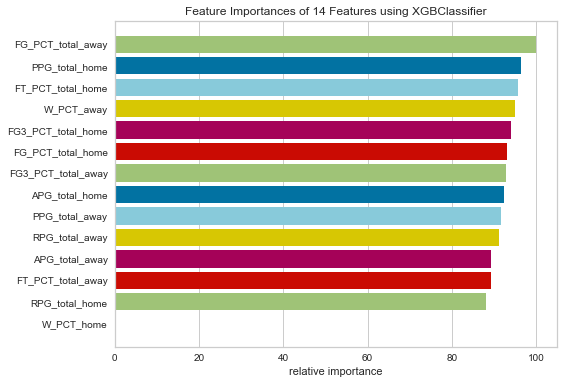

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'reg_lambda': 1}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      1618
           1       0.50      0.49      0.50      1641

    accuracy                           0.50      3259
   macro avg       0.50      0.50      0.50      3259
weighted avg       0.50      0.50      0.50      3259



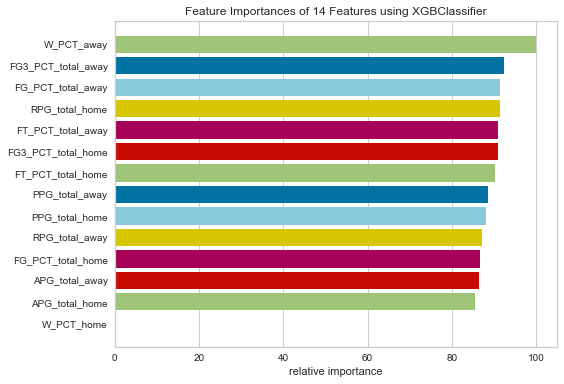

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.2}): 0.49
              precision    recall  f1-score   support

           0       0.49      0.52      0.51      1627
           1       0.49      0.47      0.48      1632

    accuracy                           0.49      3259
   macro avg       0.49      0.49      0.49      3259
weighted avg       0.49      0.49      0.49      3259



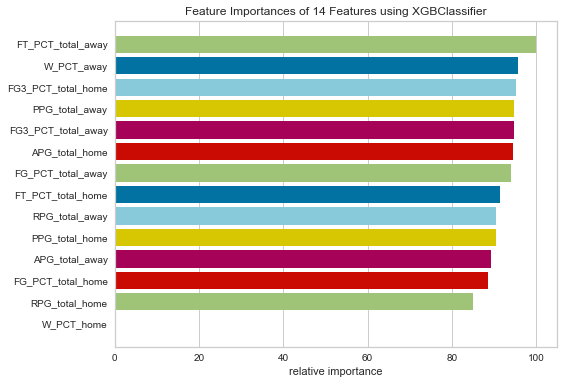

---------------------------------------------
Mean accuracy: 0.5121585199645342
Max accuracy: 0.5277692543725069
Min accuracy: 0.49861920834611845
i=15
FT:

Best XGBoost accuracy ({'reg_lambda': 0.65}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1654
           1       0.50      0.50      0.50      1585

    accuracy                           0.51      3239
   macro avg       0.51      0.51      0.51      3239
weighted avg       0.51      0.51      0.51      3239



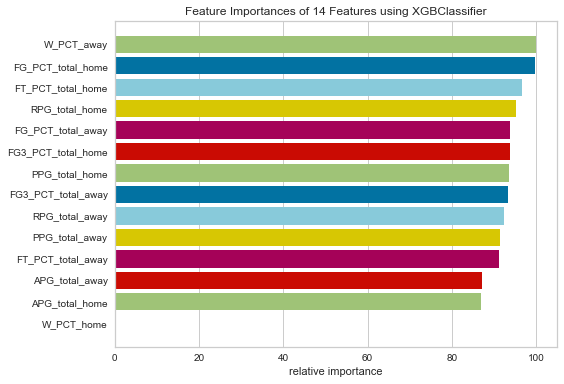

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'reg_lambda': 0.35}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1604
           1       0.51      0.51      0.51      1635

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.50      3239
weighted avg       0.50      0.50      0.50      3239



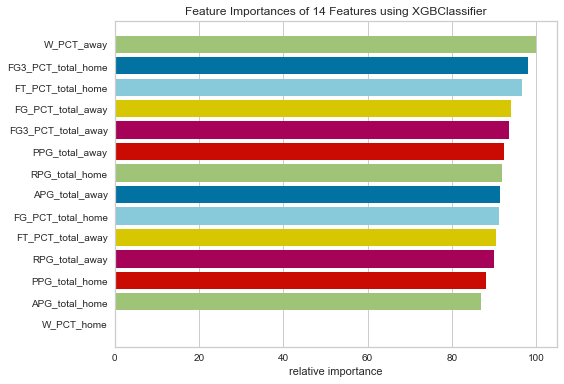

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'reg_lambda': 0.15}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.50      0.50      1647
           1       0.49      0.50      0.50      1591

    accuracy                           0.50      3238
   macro avg       0.50      0.50      0.50      3238
weighted avg       0.50      0.50      0.50      3238



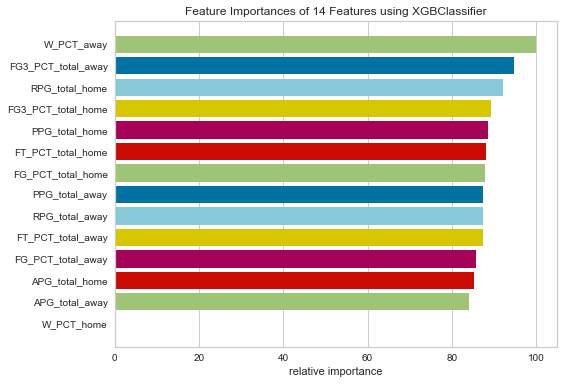

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'reg_lambda': 0.2}): 0.52
              precision    recall  f1-score   support

           0       0.52      0.53      0.52      1625
           1       0.51      0.50      0.51      1613

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



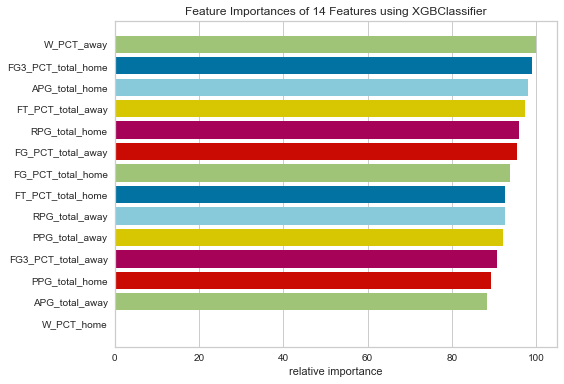

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'reg_lambda': 0.9}): 0.51
              precision    recall  f1-score   support

           0       0.49      0.52      0.51      1566
           1       0.53      0.50      0.51      1672

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.51      3238
weighted avg       0.51      0.51      0.51      3238



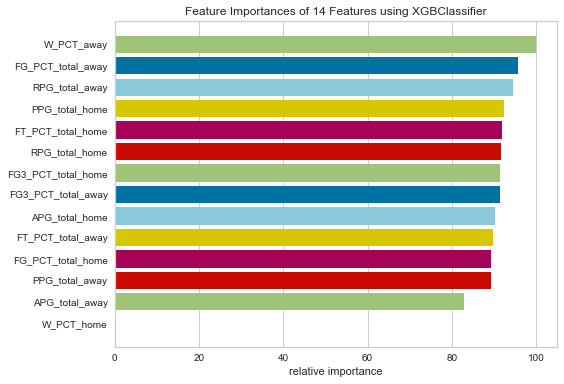

---------------------------------------------
Mean accuracy: 0.5071021966112891
Max accuracy: 0.515750463248919
Min accuracy: 0.5003088326127239
i=20
AST:

Best XGBoost accuracy ({'reg_lambda': 0.15}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1810
           1       0.54      0.54      0.54      1706

    accuracy                           0.55      3516
   macro avg       0.55      0.55      0.55      3516
weighted avg       0.55      0.55      0.55      3516



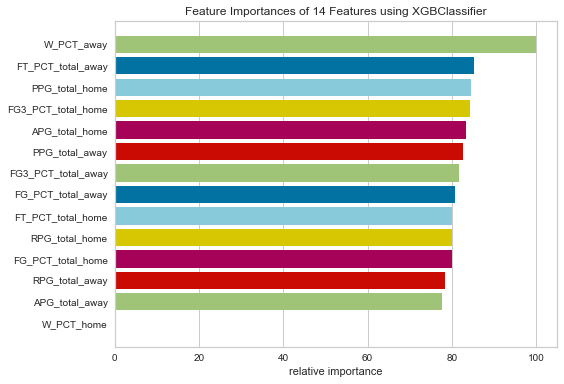

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'reg_lambda': 0.35}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.56      0.57      1793
           1       0.55      0.57      0.56      1722

    accuracy                           0.56      3515
   macro avg       0.56      0.56      0.56      3515
weighted avg       0.56      0.56      0.56      3515



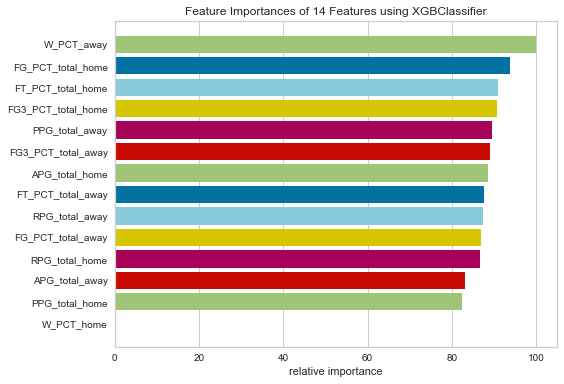

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'reg_lambda': 0.45}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1750
           1       0.57      0.56      0.56      1765

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.57      0.57      0.57      3515



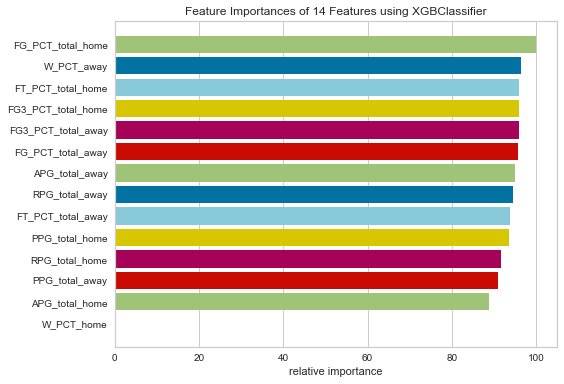

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'reg_lambda': 0.85}): 0.55
              precision    recall  f1-score   support

           0       0.54      0.60      0.57      1720
           1       0.57      0.51      0.54      1795

    accuracy                           0.55      3515
   macro avg       0.55      0.55      0.55      3515
weighted avg       0.55      0.55      0.55      3515



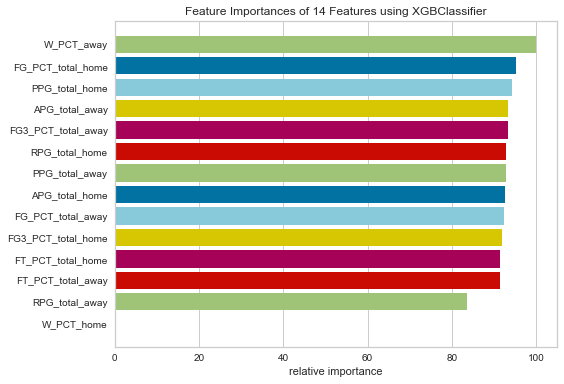

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'reg_lambda': 0.55}): 0.56
              precision    recall  f1-score   support

           0       0.54      0.58      0.56      1715
           1       0.57      0.54      0.55      1800

    accuracy                           0.56      3515
   macro avg       0.56      0.56      0.56      3515
weighted avg       0.56      0.56      0.56      3515



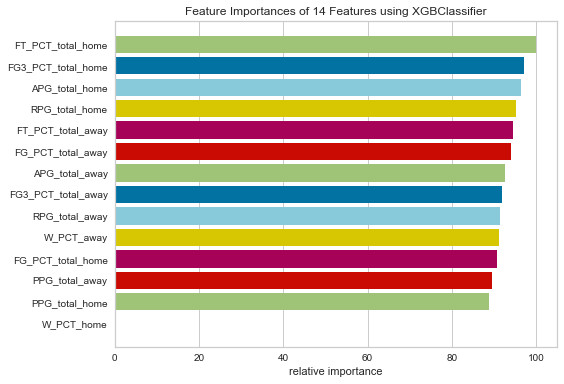

---------------------------------------------
Mean accuracy: 0.5581400895236893
Max accuracy: 0.5658605974395448
Min accuracy: 0.5503412969283277
i=25
REB:

Best XGBoost accuracy ({'reg_lambda': 0.1}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1739
           1       0.53      0.52      0.52      1682

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



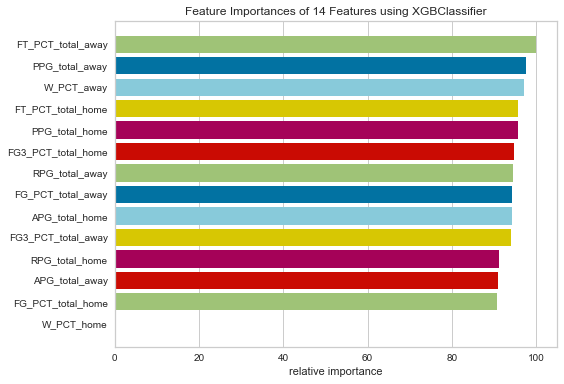

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'reg_lambda': 0.2}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1725
           1       0.53      0.53      0.53      1696

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



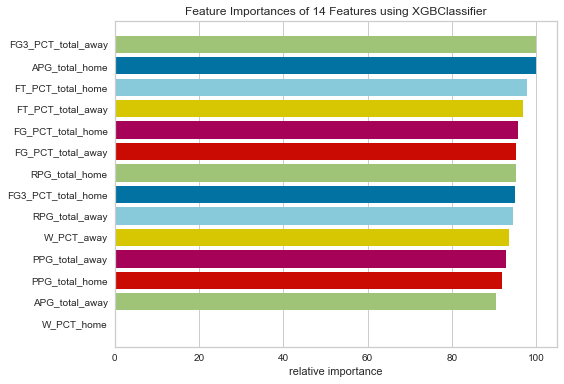

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'reg_lambda': 0.0}): 0.53
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      1710
           1       0.53      0.51      0.52      1711

    accuracy                           0.53      3421
   macro avg       0.53      0.53      0.53      3421
weighted avg       0.53      0.53      0.53      3421



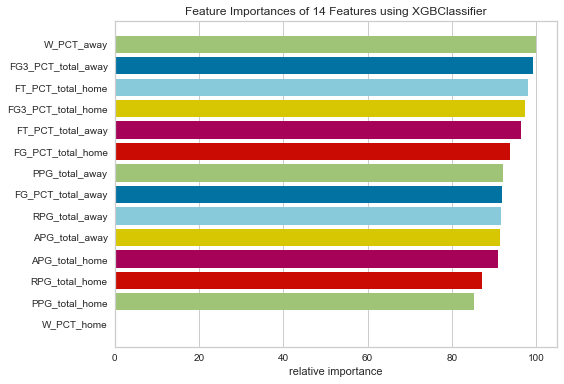

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'reg_lambda': 0.4}): 0.53
              precision    recall  f1-score   support

           0       0.52      0.57      0.54      1668
           1       0.55      0.49      0.52      1753

    accuracy                           0.53      3421
   macro avg       0.53      0.53      0.53      3421
weighted avg       0.53      0.53      0.53      3421



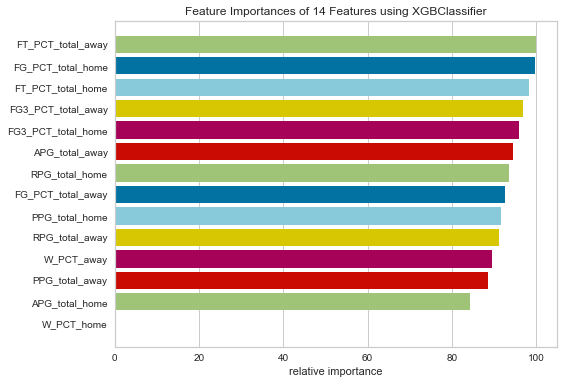

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'reg_lambda': 0.75}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.55      0.55      1710
           1       0.54      0.53      0.54      1710

    accuracy                           0.54      3420
   macro avg       0.54      0.54      0.54      3420
weighted avg       0.54      0.54      0.54      3420



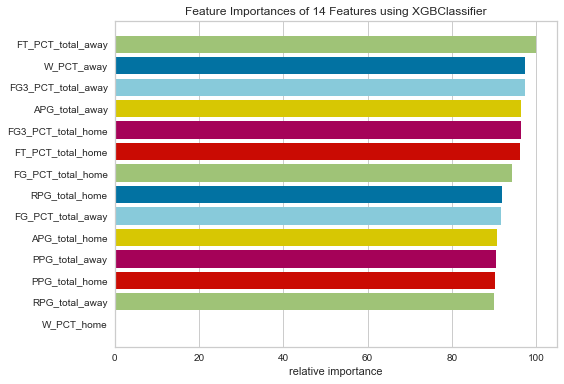

---------------------------------------------
Mean accuracy: 0.5324466530254311
Max accuracy: 0.5375621163402514
Min accuracy: 0.5252850043846828


In [30]:
# L2 regularization term on weights. Increasing this value will make model more conservative.

print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'reg_lambda': [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
})

## Try prune learning rate

i=0
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.95}): 0.63
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1928
           1       0.64      0.58      0.61      1882

    accuracy                           0.63      3810
   macro avg       0.63      0.63      0.63      3810
weighted avg       0.63      0.63      0.63      3810



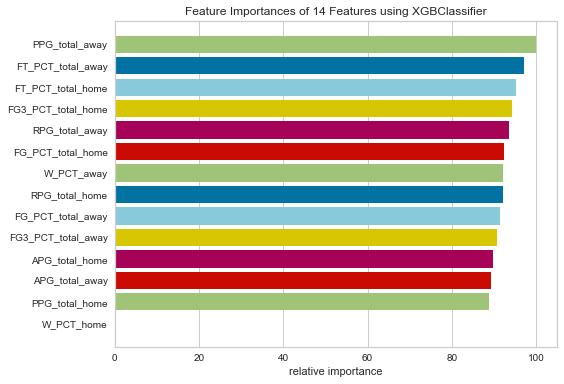

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.7}): 0.63
              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1884
           1       0.64      0.58      0.61      1926

    accuracy                           0.63      3810
   macro avg       0.63      0.63      0.63      3810
weighted avg       0.63      0.63      0.63      3810



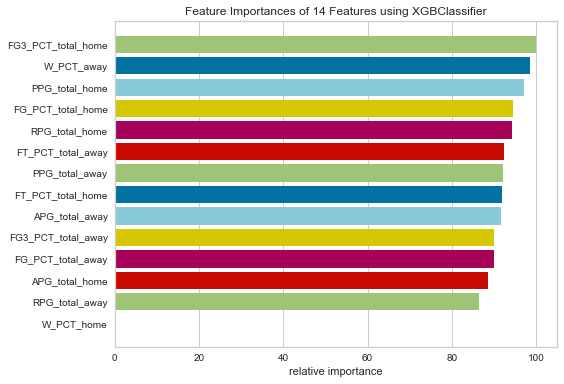

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.8}): 0.64
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      1934
           1       0.64      0.61      0.62      1876

    accuracy                           0.64      3810
   macro avg       0.64      0.64      0.64      3810
weighted avg       0.64      0.64      0.64      3810



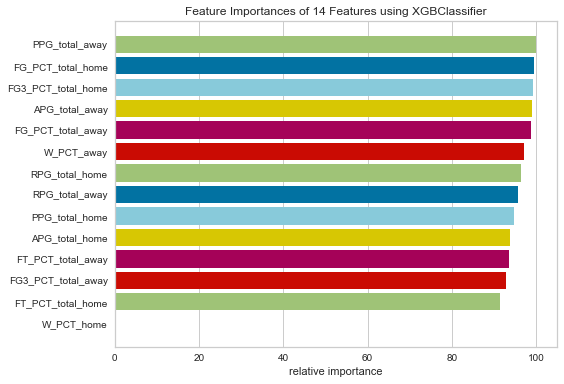

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.85}): 0.62
              precision    recall  f1-score   support

           0       0.60      0.67      0.64      1855
           1       0.65      0.58      0.61      1954

    accuracy                           0.62      3809
   macro avg       0.63      0.63      0.62      3809
weighted avg       0.63      0.62      0.62      3809



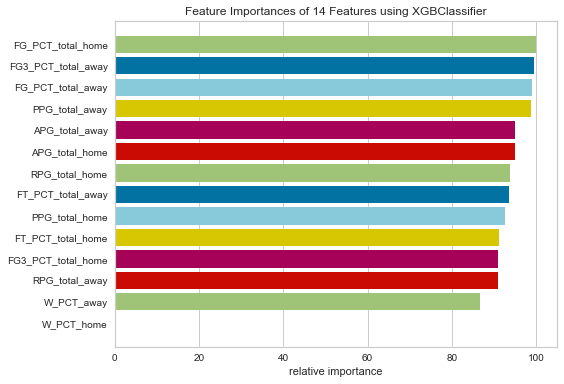

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'learning_rate': 0.85}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      1923
           1       0.65      0.61      0.63      1886

    accuracy                           0.65      3809
   macro avg       0.65      0.65      0.65      3809
weighted avg       0.65      0.65      0.65      3809



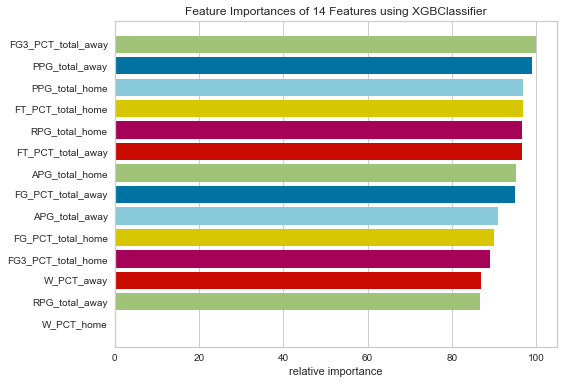

---------------------------------------------
Mean accuracy: 0.6289123908080668
Max accuracy: 0.6359580052493439
Min accuracy: 0.624835914938304
i=5
FGP:

Best XGBoost accuracy ({'learning_rate': 0.8}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.60      0.58      1777
           1       0.57      0.53      0.55      1777

    accuracy                           0.57      3554
   macro avg       0.57      0.57      0.57      3554
weighted avg       0.57      0.57      0.57      3554



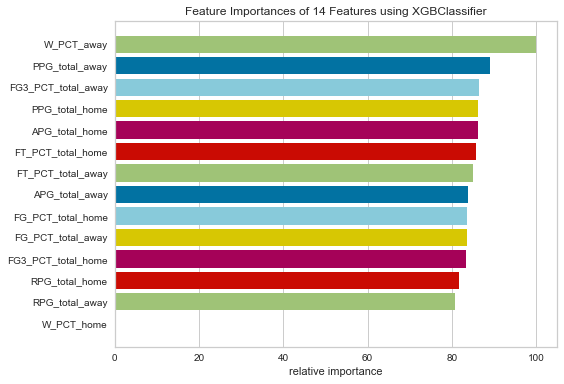

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'learning_rate': 0.9}): 0.57
              precision    recall  f1-score   support

           0       0.57      0.60      0.58      1795
           1       0.57      0.53      0.55      1759

    accuracy                           0.57      3554
   macro avg       0.57      0.57      0.57      3554
weighted avg       0.57      0.57      0.57      3554



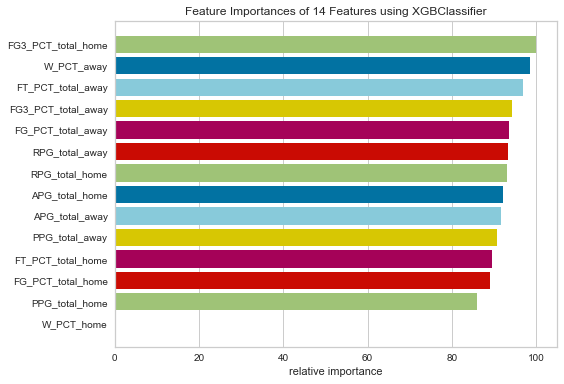

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'learning_rate': 0.85}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.60      0.59      1785
           1       0.58      0.55      0.56      1769

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



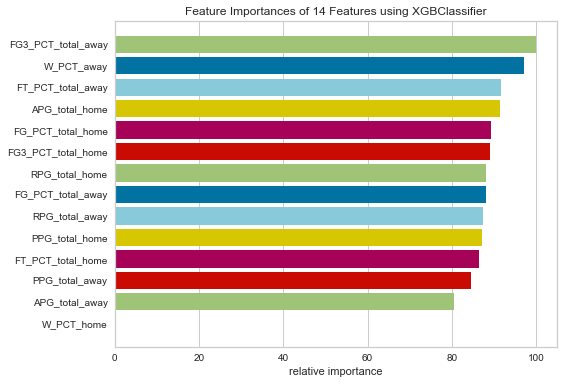

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'learning_rate': 0.95}): 0.58
              precision    recall  f1-score   support

           0       0.56      0.61      0.58      1743
           1       0.59      0.55      0.57      1810

    accuracy                           0.58      3553
   macro avg       0.58      0.58      0.58      3553
weighted avg       0.58      0.58      0.58      3553



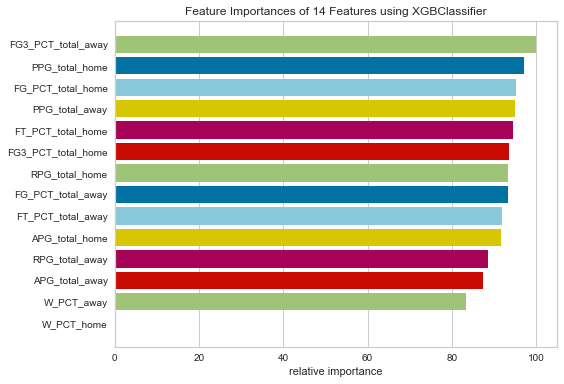

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'learning_rate': 0.95}): 0.57
              precision    recall  f1-score   support

           0       0.57      0.62      0.59      1784
           1       0.58      0.53      0.55      1769

    accuracy                           0.57      3553
   macro avg       0.57      0.57      0.57      3553
weighted avg       0.57      0.57      0.57      3553



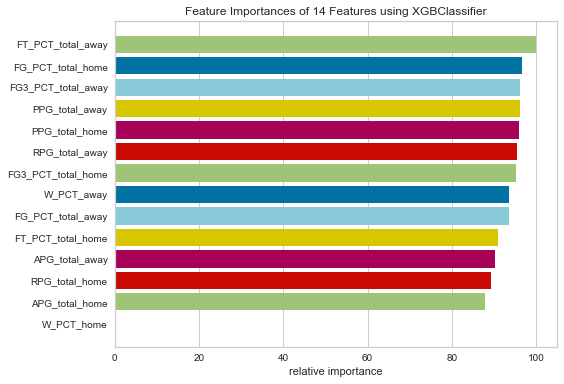

---------------------------------------------
Mean accuracy: 0.5720721200516783
Max accuracy: 0.5772586546580355
Min accuracy: 0.5669667979741136
i=10
FG3:

Best XGBoost accuracy ({'learning_rate': 0.4}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1655
           1       0.49      0.51      0.50      1605

    accuracy                           0.50      3260
   macro avg       0.50      0.50      0.50      3260
weighted avg       0.50      0.50      0.50      3260



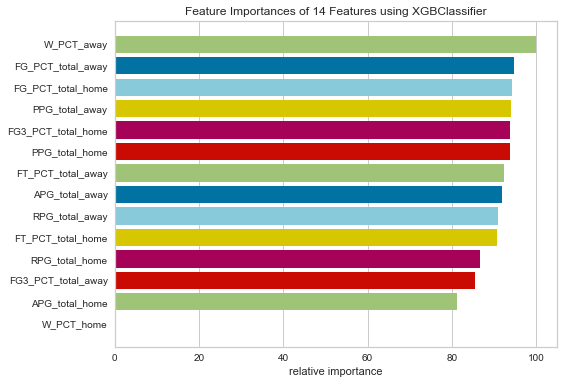

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'learning_rate': 0.6}): 0.52
              precision    recall  f1-score   support

           0       0.50      0.53      0.52      1581
           1       0.53      0.51      0.52      1678

    accuracy                           0.52      3259
   macro avg       0.52      0.52      0.52      3259
weighted avg       0.52      0.52      0.52      3259



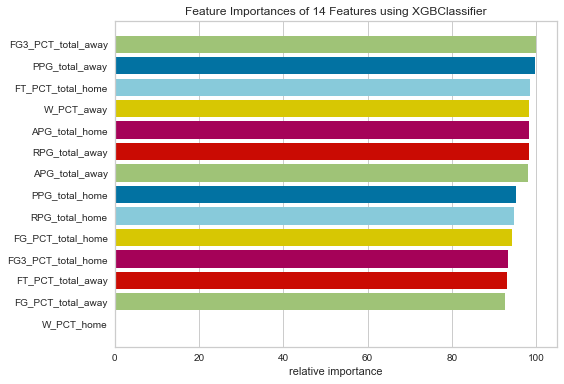

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'learning_rate': 0.75}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.51      0.52      1667
           1       0.51      0.52      0.51      1592

    accuracy                           0.52      3259
   macro avg       0.52      0.52      0.52      3259
weighted avg       0.52      0.52      0.52      3259



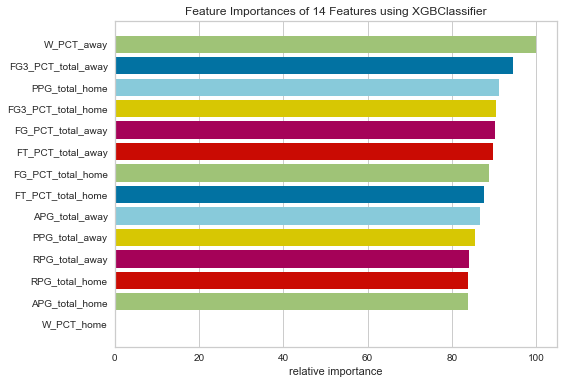

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'learning_rate': 0.9}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1618
           1       0.52      0.50      0.51      1641

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



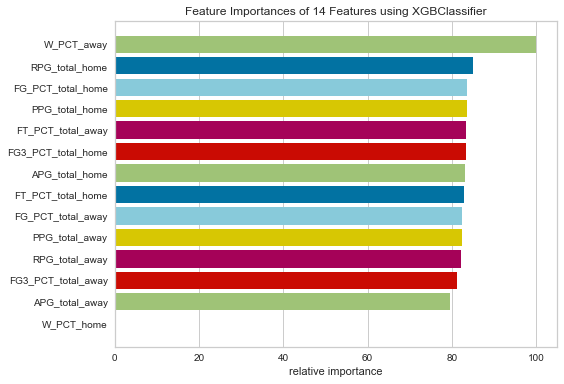

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'learning_rate': 0.65}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.54      0.53      1627
           1       0.52      0.49      0.50      1632

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



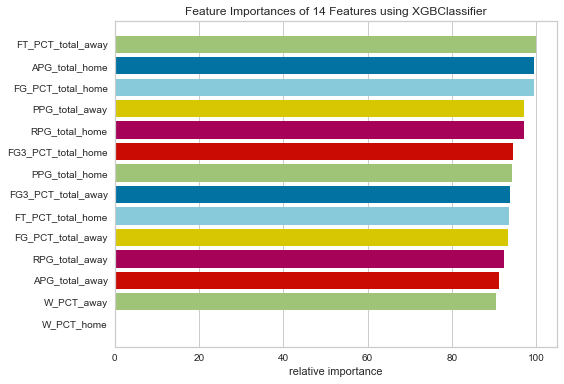

---------------------------------------------
Mean accuracy: 0.5122353482663393
Max accuracy: 0.5185639766799631
Min accuracy: 0.5
i=15
FT:

Best XGBoost accuracy ({'learning_rate': 0.5}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1654
           1       0.50      0.50      0.50      1585

    accuracy                           0.51      3239
   macro avg       0.51      0.51      0.51      3239
weighted avg       0.51      0.51      0.51      3239



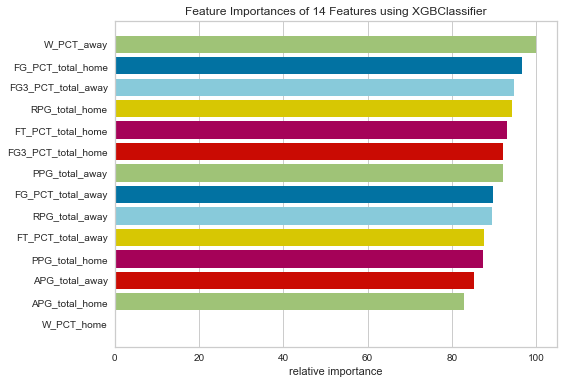

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'learning_rate': 0.35}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1604
           1       0.51      0.51      0.51      1635

    accuracy                           0.51      3239
   macro avg       0.51      0.51      0.51      3239
weighted avg       0.51      0.51      0.51      3239



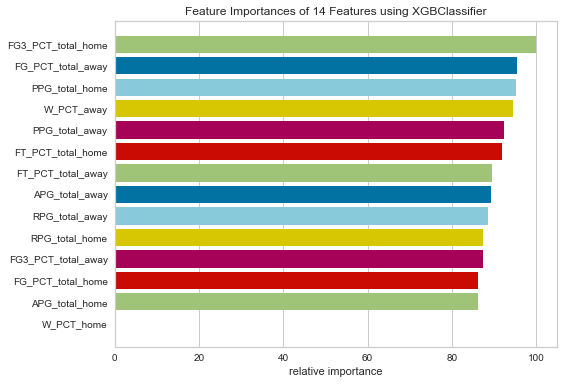

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'learning_rate': 0.85}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.51      0.51      1647
           1       0.51      0.52      0.51      1591

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.51      3238
weighted avg       0.51      0.51      0.51      3238



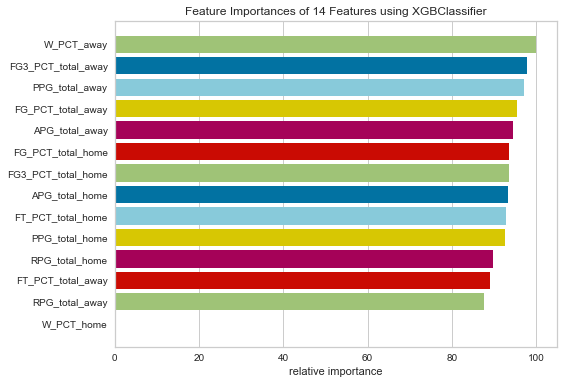

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'learning_rate': 0.25}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.50      0.50      1625
           1       0.50      0.51      0.50      1613

    accuracy                           0.50      3238
   macro avg       0.50      0.50      0.50      3238
weighted avg       0.50      0.50      0.50      3238



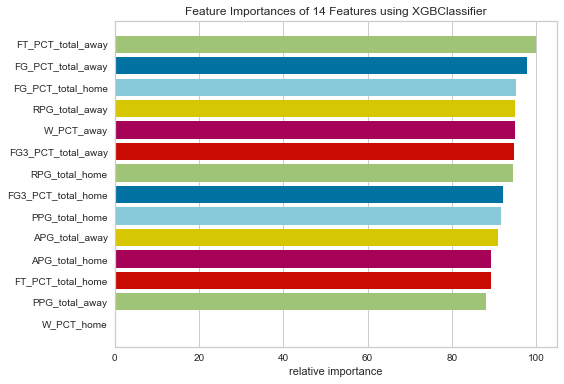

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'learning_rate': 0.85}): 0.52
              precision    recall  f1-score   support

           0       0.50      0.53      0.52      1566
           1       0.54      0.51      0.52      1672

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



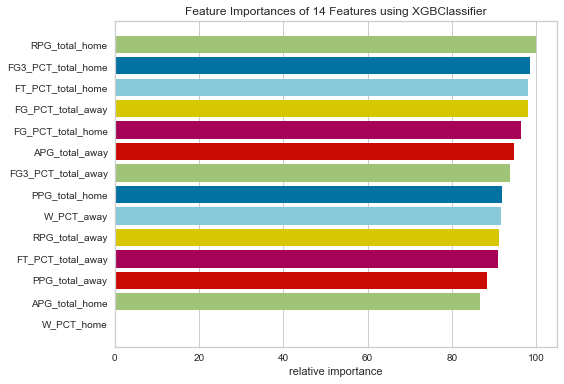

---------------------------------------------
Mean accuracy: 0.5097266302195238
Max accuracy: 0.5142063001852996
Min accuracy: 0.5040148239654108
i=20
AST:

Best XGBoost accuracy ({'learning_rate': 0.9}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.62      0.61      1810
           1       0.58      0.55      0.56      1706

    accuracy                           0.58      3516
   macro avg       0.58      0.58      0.58      3516
weighted avg       0.58      0.58      0.58      3516



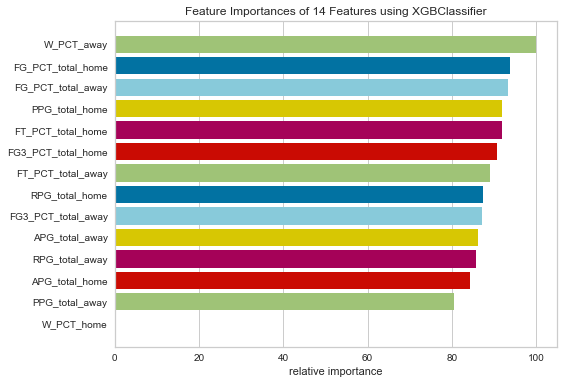

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'learning_rate': 0.95}): 0.57
              precision    recall  f1-score   support

           0       0.58      0.59      0.59      1793
           1       0.57      0.56      0.56      1722

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.57      0.57      0.57      3515



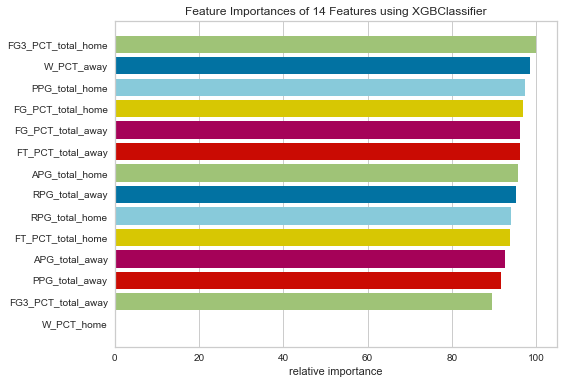

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'learning_rate': 0.9}): 0.57
              precision    recall  f1-score   support

           0       0.57      0.61      0.59      1750
           1       0.58      0.54      0.56      1765

    accuracy                           0.57      3515
   macro avg       0.58      0.57      0.57      3515
weighted avg       0.58      0.57      0.57      3515



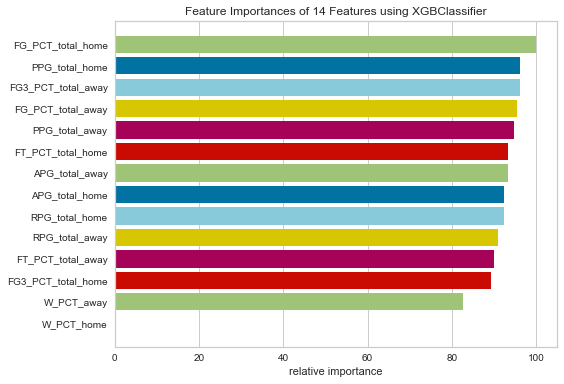

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'learning_rate': 0.95}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.59      0.58      1720
           1       0.59      0.55      0.57      1795

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.57      0.57      0.57      3515



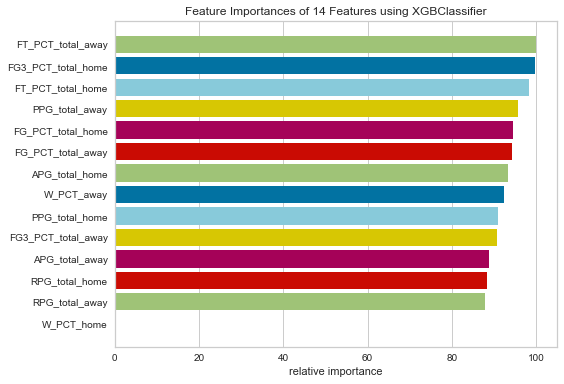

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'learning_rate': 0.85}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.59      0.57      1715
           1       0.58      0.55      0.57      1800

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.57      0.57      0.57      3515



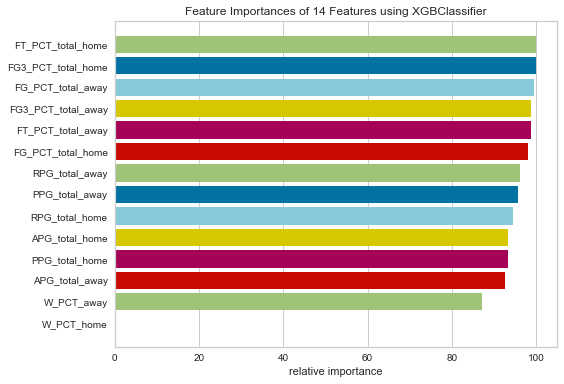

---------------------------------------------
Mean accuracy: 0.576914333500017
Max accuracy: 0.5844709897610921
Min accuracy: 0.5741109530583215
i=25
REB:

Best XGBoost accuracy ({'learning_rate': 0.95}): 0.53
              precision    recall  f1-score   support

           0       0.54      0.55      0.55      1739
           1       0.53      0.51      0.52      1682

    accuracy                           0.53      3421
   macro avg       0.53      0.53      0.53      3421
weighted avg       0.53      0.53      0.53      3421



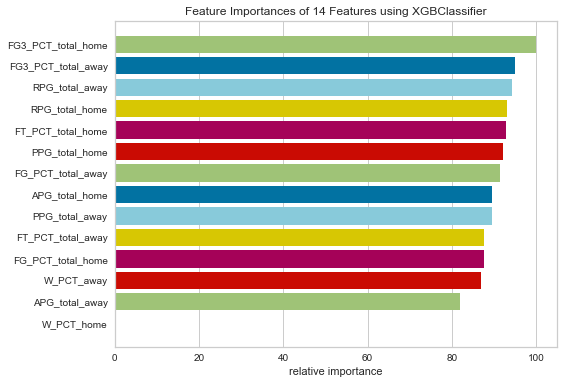

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'learning_rate': 0.8}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.56      0.57      1725
           1       0.56      0.56      0.56      1696

    accuracy                           0.56      3421
   macro avg       0.56      0.56      0.56      3421
weighted avg       0.56      0.56      0.56      3421



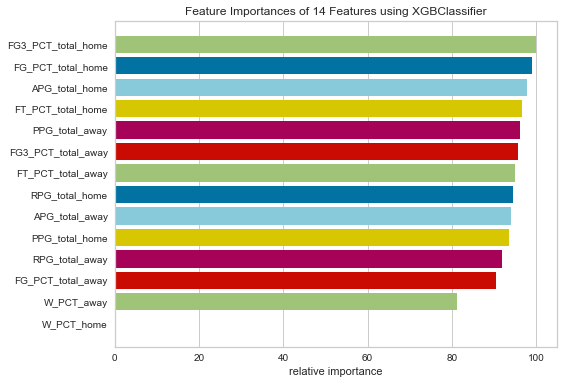

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'learning_rate': 0.8}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.58      0.56      1710
           1       0.55      0.52      0.54      1711

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



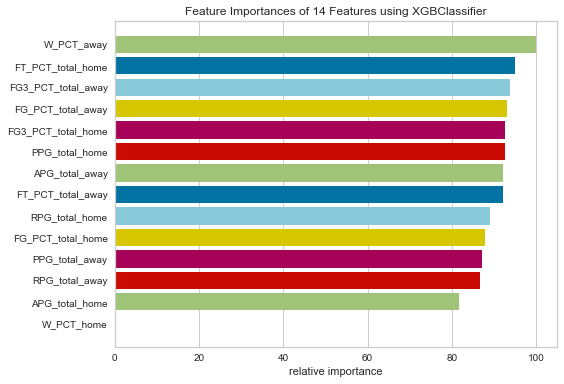

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'learning_rate': 0.85}): 0.55
              precision    recall  f1-score   support

           0       0.54      0.59      0.56      1668
           1       0.57      0.52      0.54      1753

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



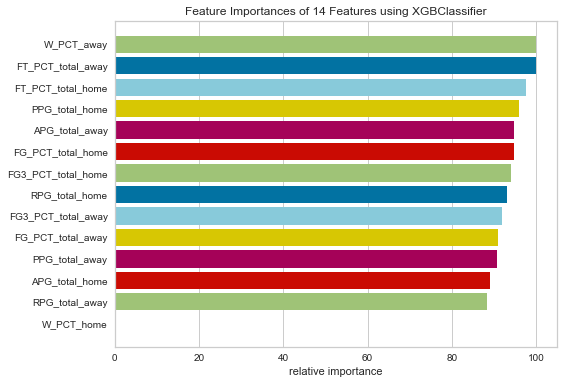

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'learning_rate': 0.65}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.56      0.56      1710
           1       0.55      0.54      0.54      1710

    accuracy                           0.55      3420
   macro avg       0.55      0.55      0.55      3420
weighted avg       0.55      0.55      0.55      3420



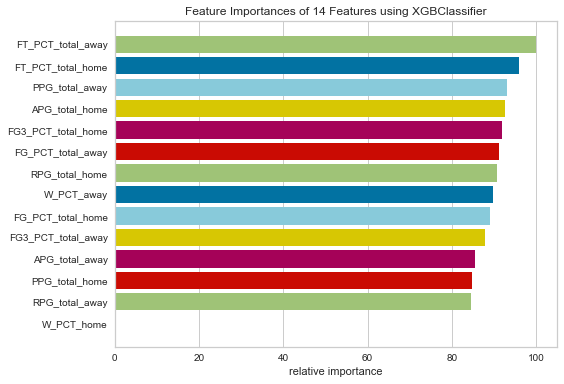

---------------------------------------------
Mean accuracy: 0.5496930722011109
Max accuracy: 0.5624086524408067
Min accuracy: 0.5334697456883952


In [31]:
# Step size shrinkage used in update to prevent overfitting.  
# After each boosting step, we can directly get the weights of new features. 
# learnig rate shrinks the feature weights to make the boosting process more conservative.

print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'learning_rate' : [0.0,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
})

## Try prune gamma

i=0
WINNER:

Best XGBoost accuracy ({'gamma': 2}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.61      0.60      1928
           1       0.59      0.58      0.58      1882

    accuracy                           0.59      3810
   macro avg       0.59      0.59      0.59      3810
weighted avg       0.59      0.59      0.59      3810



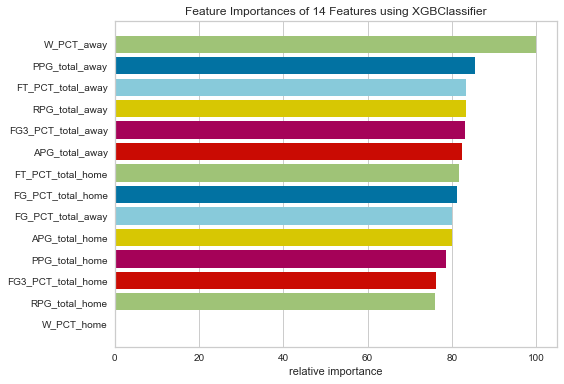

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'gamma': 0}): 0.60
              precision    recall  f1-score   support

           0       0.59      0.63      0.61      1884
           1       0.61      0.58      0.60      1926

    accuracy                           0.60      3810
   macro avg       0.60      0.60      0.60      3810
weighted avg       0.60      0.60      0.60      3810



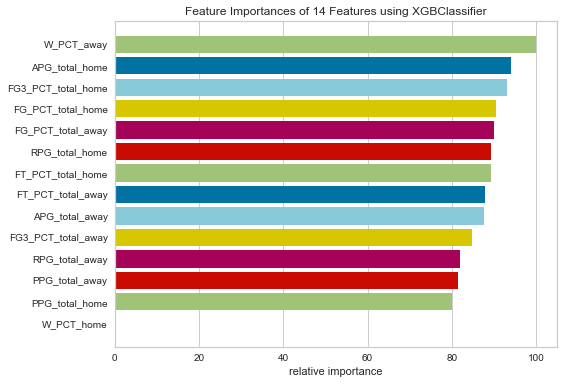

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'gamma': 2}): 0.61
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1934
           1       0.61      0.60      0.60      1876

    accuracy                           0.61      3810
   macro avg       0.61      0.61      0.61      3810
weighted avg       0.61      0.61      0.61      3810



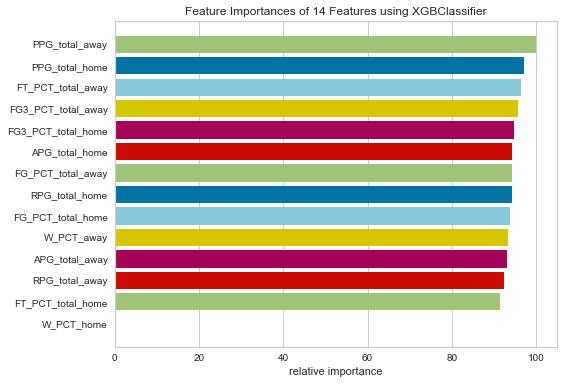

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'gamma': 5}): 0.54
              precision    recall  f1-score   support

           0       0.53      0.59      0.56      1855
           1       0.56      0.50      0.53      1954

    accuracy                           0.54      3809
   macro avg       0.55      0.54      0.54      3809
weighted avg       0.55      0.54      0.54      3809



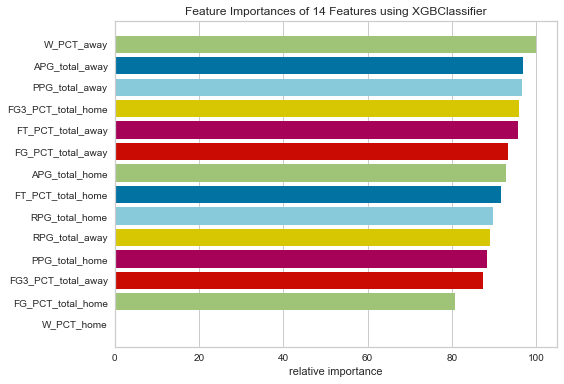

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'gamma': 11}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1923
           1       0.49      0.50      0.50      1886

    accuracy                           0.50      3809
   macro avg       0.50      0.50      0.50      3809
weighted avg       0.50      0.50      0.50      3809



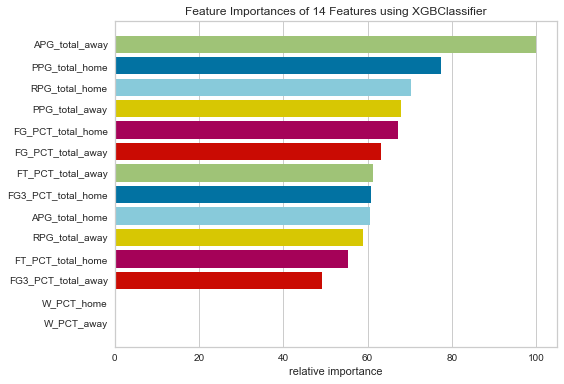

---------------------------------------------
Mean accuracy: 0.5874372514606585
Max accuracy: 0.610498687664042
Min accuracy: 0.5437122604358099
i=5
FGP:

Best XGBoost accuracy ({'gamma': 2}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1777
           1       0.56      0.54      0.55      1777

    accuracy                           0.56      3554
   macro avg       0.56      0.56      0.56      3554
weighted avg       0.56      0.56      0.56      3554



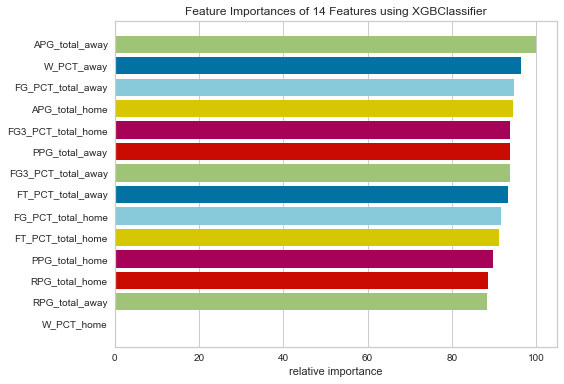

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'gamma': 1}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1795
           1       0.55      0.55      0.55      1759

    accuracy                           0.56      3554
   macro avg       0.56      0.56      0.56      3554
weighted avg       0.56      0.56      0.56      3554



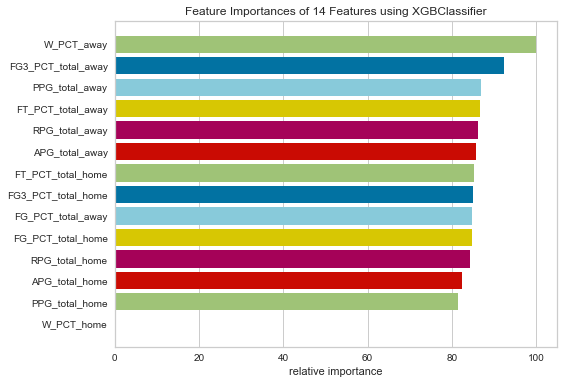

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'gamma': 1}): 0.57
              precision    recall  f1-score   support

           0       0.57      0.58      0.58      1785
           1       0.57      0.55      0.56      1769

    accuracy                           0.57      3554
   macro avg       0.57      0.57      0.57      3554
weighted avg       0.57      0.57      0.57      3554



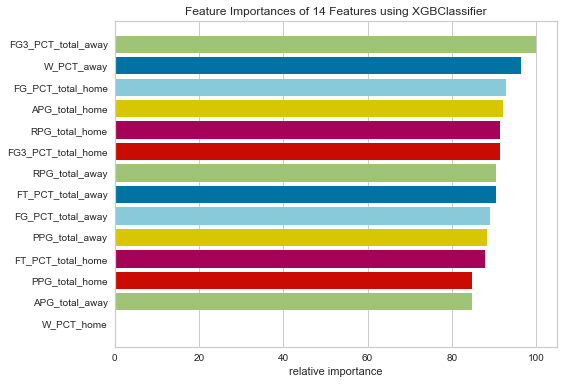

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'gamma': 0}): 0.56
              precision    recall  f1-score   support

           0       0.55      0.58      0.56      1743
           1       0.57      0.54      0.55      1810

    accuracy                           0.56      3553
   macro avg       0.56      0.56      0.56      3553
weighted avg       0.56      0.56      0.56      3553



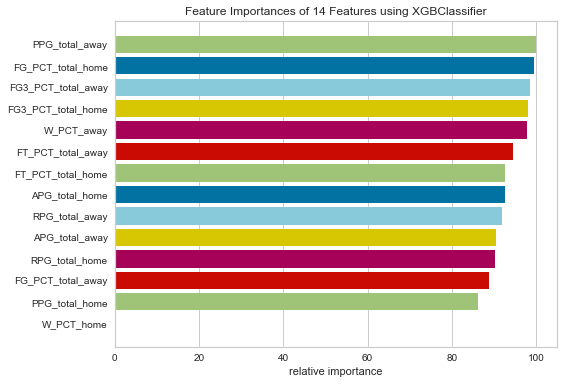

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'gamma': 4}): 0.53
              precision    recall  f1-score   support

           0       0.54      0.51      0.53      1784
           1       0.53      0.56      0.54      1769

    accuracy                           0.53      3553
   macro avg       0.53      0.53      0.53      3553
weighted avg       0.53      0.53      0.53      3553



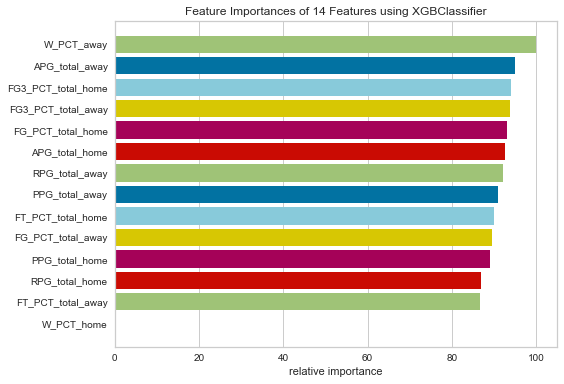

---------------------------------------------
Mean accuracy: 0.5600420341160727
Max accuracy: 0.5683736634777715
Min accuracy: 0.556274620146314
i=10
FG3:

Best XGBoost accuracy ({'gamma': 27}): 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1655
           1       0.49      1.00      0.66      1605

    accuracy                           0.49      3260
   macro avg       0.25      0.50      0.33      3260
weighted avg       0.24      0.49      0.32      3260



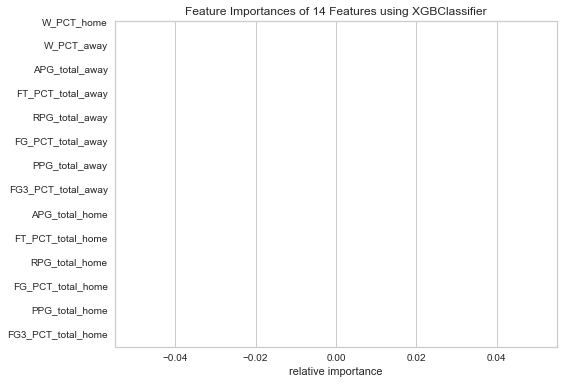

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'gamma': 28}): 0.49
              precision    recall  f1-score   support

           0       0.49      1.00      0.65      1581
           1       0.00      0.00      0.00      1678

    accuracy                           0.49      3259
   macro avg       0.24      0.50      0.33      3259
weighted avg       0.24      0.49      0.32      3259



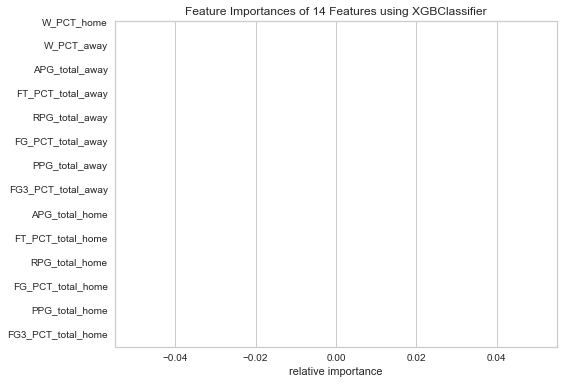

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'gamma': 0}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.52      0.53      1667
           1       0.51      0.53      0.52      1592

    accuracy                           0.52      3259
   macro avg       0.52      0.52      0.52      3259
weighted avg       0.52      0.52      0.52      3259



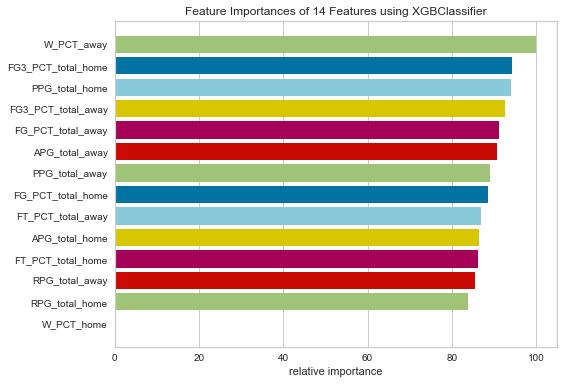

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'gamma': 0}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      1618
           1       0.50      0.49      0.50      1641

    accuracy                           0.50      3259
   macro avg       0.50      0.50      0.50      3259
weighted avg       0.50      0.50      0.50      3259



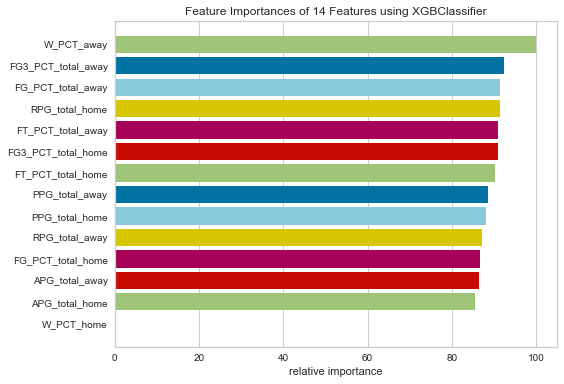

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'gamma': 2}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      1627
           1       0.50      0.48      0.49      1632

    accuracy                           0.50      3259
   macro avg       0.50      0.50      0.50      3259
weighted avg       0.50      0.50      0.50      3259



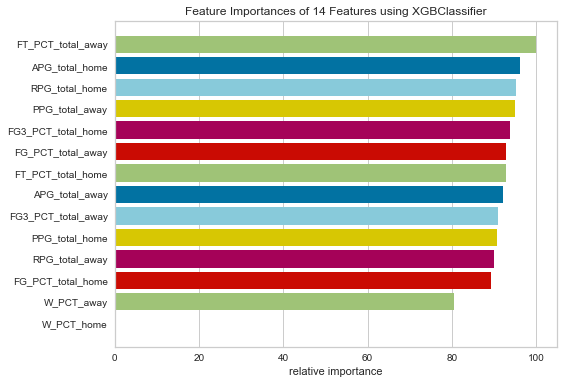

---------------------------------------------
Mean accuracy: 0.4998088116532415
Max accuracy: 0.523166615526235
Min accuracy: 0.4851181343970543
i=15
FT:

Best XGBoost accuracy ({'gamma': 6}): 0.49
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1654
           1       0.48      0.48      0.48      1585

    accuracy                           0.49      3239
   macro avg       0.49      0.49      0.49      3239
weighted avg       0.49      0.49      0.49      3239



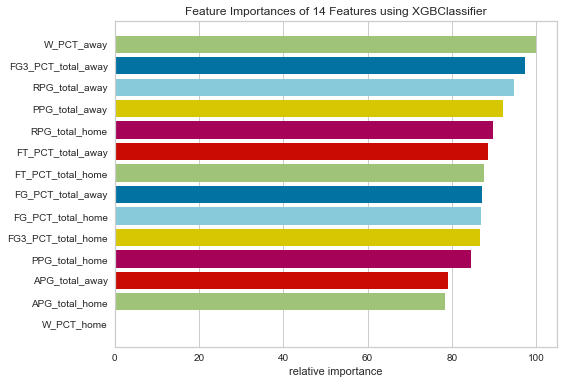

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'gamma': 11}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.58      0.54      1604
           1       0.51      0.44      0.47      1635

    accuracy                           0.51      3239
   macro avg       0.51      0.51      0.51      3239
weighted avg       0.51      0.51      0.51      3239



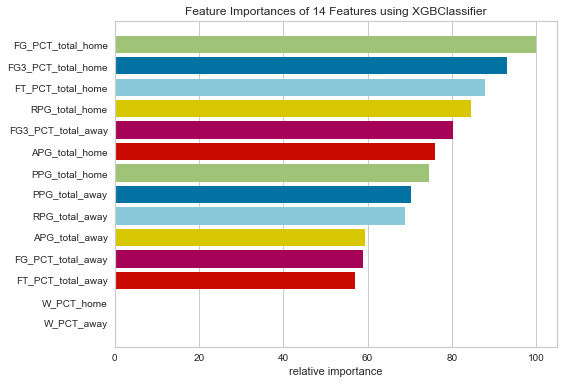

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'gamma': 2}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.51      0.51      1647
           1       0.50      0.52      0.51      1591

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.51      3238
weighted avg       0.51      0.51      0.51      3238



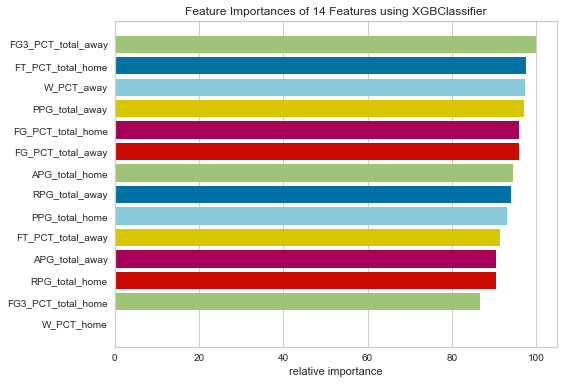

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'gamma': 8}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.48      0.50      1625
           1       0.51      0.53      0.52      1613

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.51      3238
weighted avg       0.51      0.51      0.51      3238



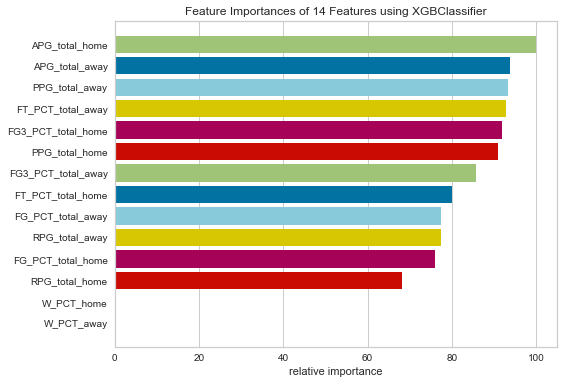

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'gamma': 8}): 0.50
              precision    recall  f1-score   support

           0       0.49      0.56      0.52      1566
           1       0.52      0.46      0.49      1672

    accuracy                           0.50      3238
   macro avg       0.51      0.51      0.50      3238
weighted avg       0.51      0.50      0.50      3238



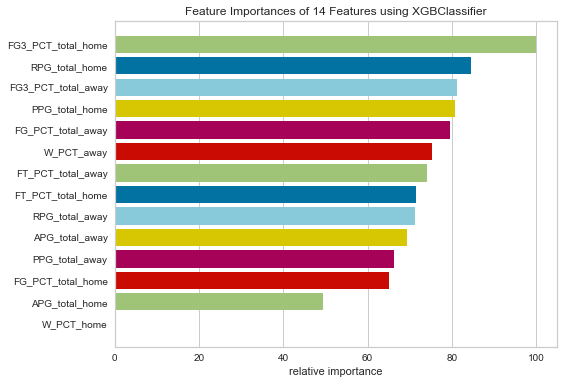

---------------------------------------------
Mean accuracy: 0.503860646029389
Max accuracy: 0.5105003088326128
Min accuracy: 0.48903982710713184
i=20
AST:

Best XGBoost accuracy ({'gamma': 2}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.56      0.57      1810
           1       0.54      0.56      0.55      1706

    accuracy                           0.56      3516
   macro avg       0.56      0.56      0.56      3516
weighted avg       0.56      0.56      0.56      3516



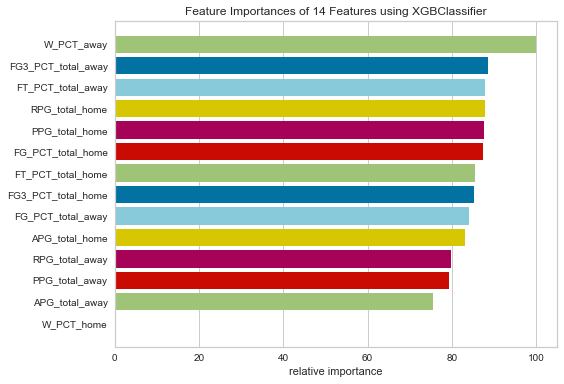

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'gamma': 4}): 0.53
              precision    recall  f1-score   support

           0       0.54      0.52      0.53      1793
           1       0.52      0.54      0.53      1722

    accuracy                           0.53      3515
   macro avg       0.53      0.53      0.53      3515
weighted avg       0.53      0.53      0.53      3515



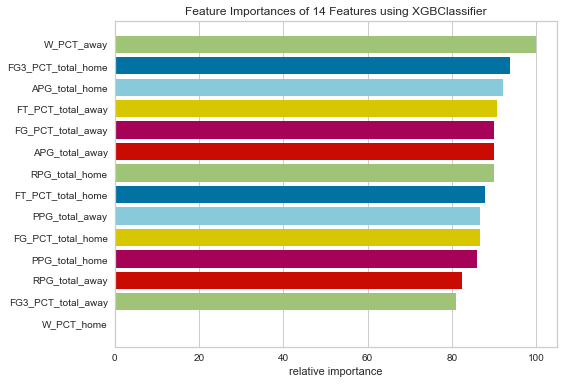

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'gamma': 6}): 0.53
              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1750
           1       0.54      0.50      0.52      1765

    accuracy                           0.53      3515
   macro avg       0.53      0.53      0.53      3515
weighted avg       0.53      0.53      0.53      3515



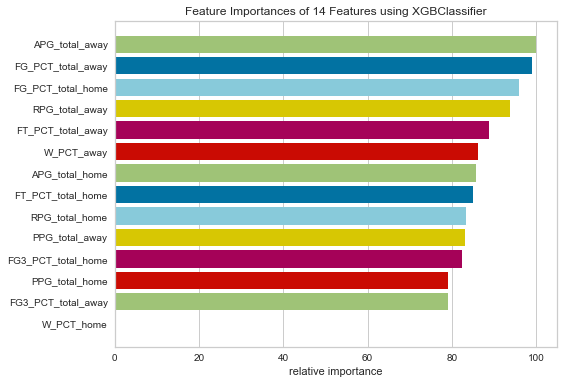

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'gamma': 0}): 0.55
              precision    recall  f1-score   support

           0       0.53      0.58      0.55      1720
           1       0.56      0.52      0.54      1795

    accuracy                           0.55      3515
   macro avg       0.55      0.55      0.55      3515
weighted avg       0.55      0.55      0.55      3515



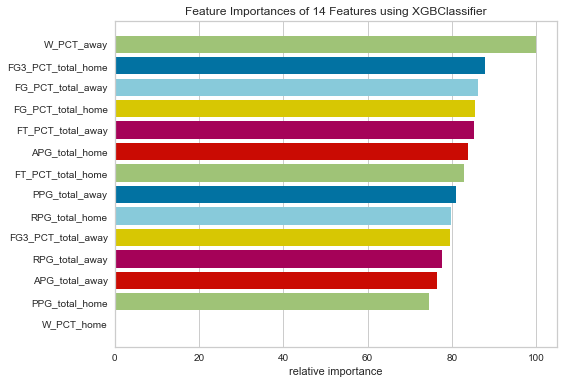

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'gamma': 6}): 0.53
              precision    recall  f1-score   support

           0       0.51      0.56      0.54      1715
           1       0.54      0.49      0.52      1800

    accuracy                           0.53      3515
   macro avg       0.53      0.53      0.53      3515
weighted avg       0.53      0.53      0.53      3515



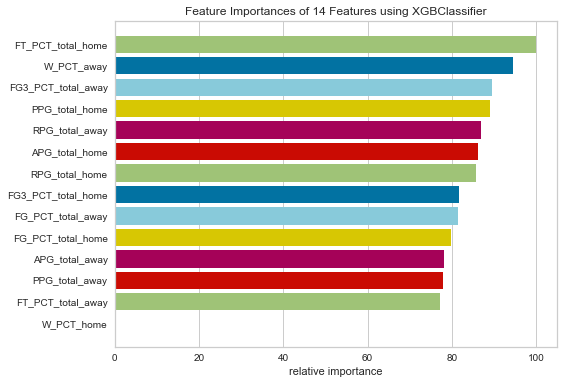

---------------------------------------------
Mean accuracy: 0.5409986778587461
Max accuracy: 0.558589306029579
Min accuracy: 0.5271692745376956
i=25
REB:

Best XGBoost accuracy ({'gamma': 1}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1739
           1       0.54      0.54      0.54      1682

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



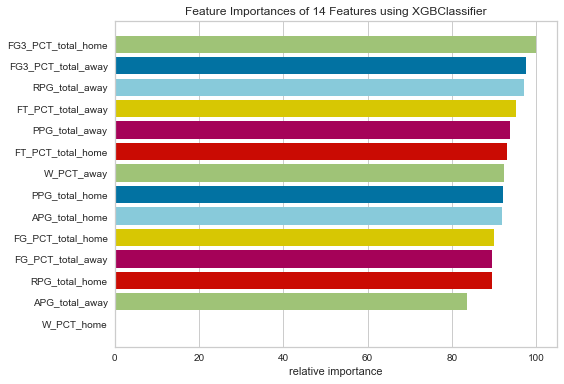

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'gamma': 2}): 0.53
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1725
           1       0.53      0.53      0.53      1696

    accuracy                           0.53      3421
   macro avg       0.53      0.53      0.53      3421
weighted avg       0.53      0.53      0.53      3421



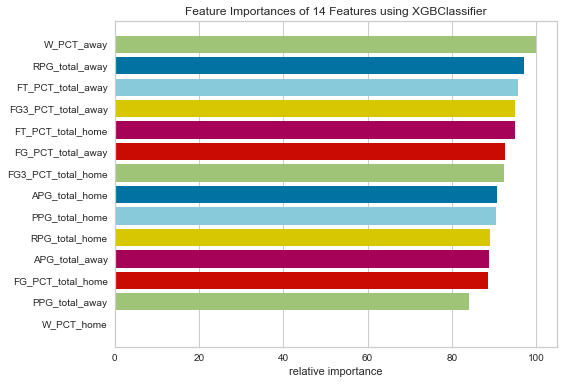

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'gamma': 2}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1710
           1       0.54      0.54      0.54      1711

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



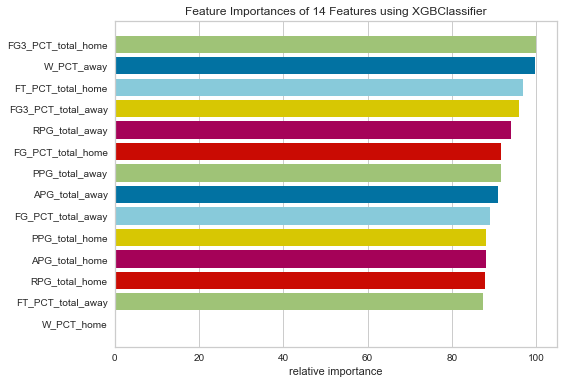

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'gamma': 2}): 0.54
              precision    recall  f1-score   support

           0       0.52      0.55      0.54      1668
           1       0.55      0.52      0.53      1753

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



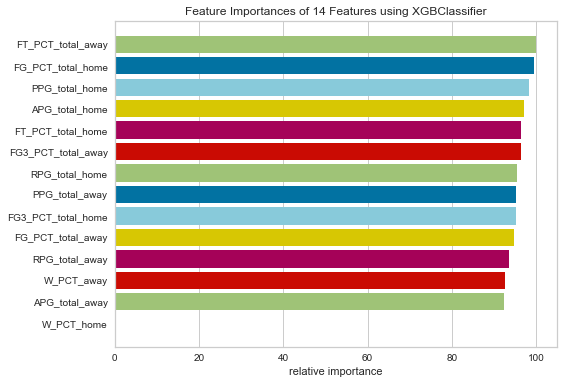

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'gamma': 1}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.54      0.55      1710
           1       0.55      0.55      0.55      1710

    accuracy                           0.55      3420
   macro avg       0.55      0.55      0.55      3420
weighted avg       0.55      0.55      0.55      3420



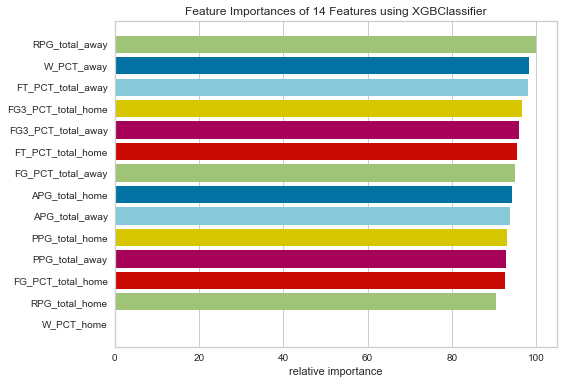

---------------------------------------------
Mean accuracy: 0.541069862613271
Max accuracy: 0.5515931014323298
Min accuracy: 0.5328851213095586


In [32]:
# Minimum loss reduction required to make a further partition on a leaf node of the tree. 
# The larger gamma is, the more conservative the algorithm will be.

print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'gamma' : [*range(0,30)],
})

## Try prune scale_pos_weight

i=0
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.60
              precision    recall  f1-score   support

           0       0.72      0.34      0.46      1928
           1       0.56      0.86      0.68      1882

    accuracy                           0.60      3810
   macro avg       0.64      0.60      0.57      3810
weighted avg       0.64      0.60      0.57      3810



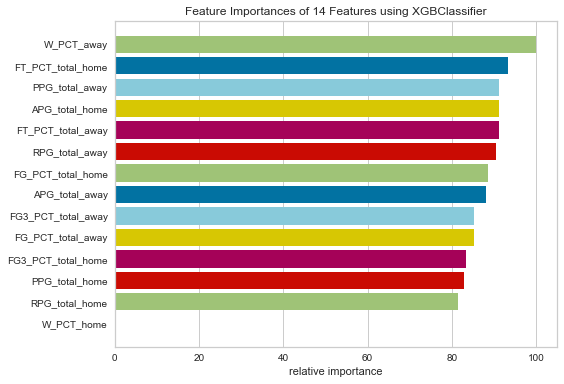

---------------------------------------------
i=1
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 4}): 0.57
              precision    recall  f1-score   support

           0       0.77      0.18      0.29      1884
           1       0.54      0.95      0.69      1926

    accuracy                           0.57      3810
   macro avg       0.66      0.56      0.49      3810
weighted avg       0.66      0.57      0.49      3810



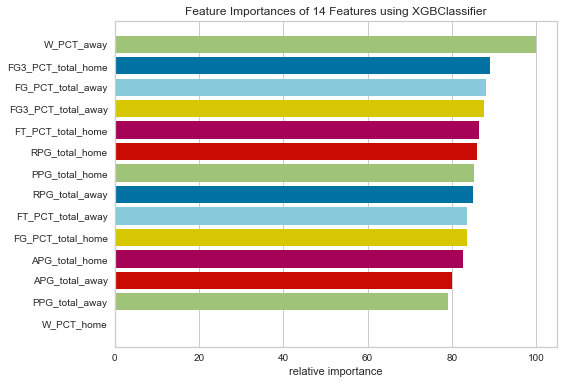

---------------------------------------------
i=2
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.59
              precision    recall  f1-score   support

           0       0.70      0.33      0.45      1934
           1       0.55      0.86      0.67      1876

    accuracy                           0.59      3810
   macro avg       0.63      0.59      0.56      3810
weighted avg       0.63      0.59      0.56      3810



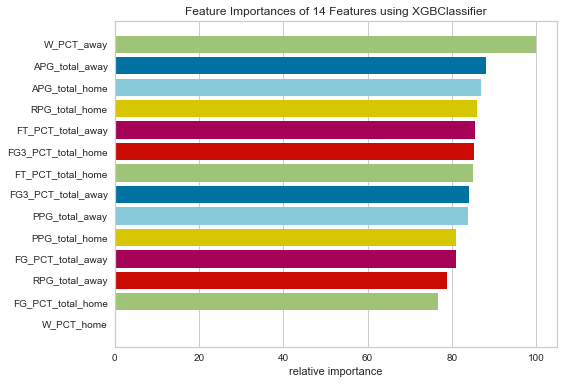

---------------------------------------------
i=3
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.60
              precision    recall  f1-score   support

           0       0.58      0.64      0.61      1855
           1       0.62      0.57      0.59      1954

    accuracy                           0.60      3809
   macro avg       0.60      0.60      0.60      3809
weighted avg       0.60      0.60      0.60      3809



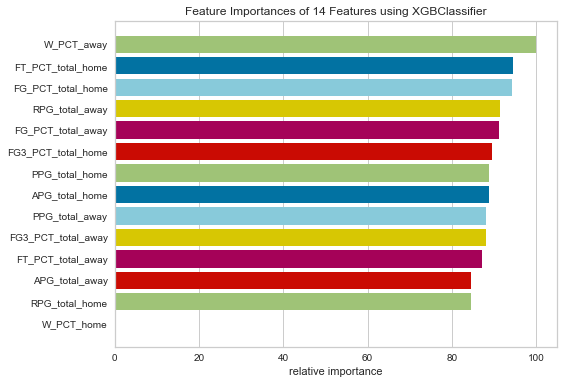

---------------------------------------------
i=4
WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 3}): 0.56
              precision    recall  f1-score   support

           0       0.71      0.22      0.34      1923
           1       0.53      0.91      0.67      1886

    accuracy                           0.56      3809
   macro avg       0.62      0.57      0.51      3809
weighted avg       0.62      0.56      0.51      3809



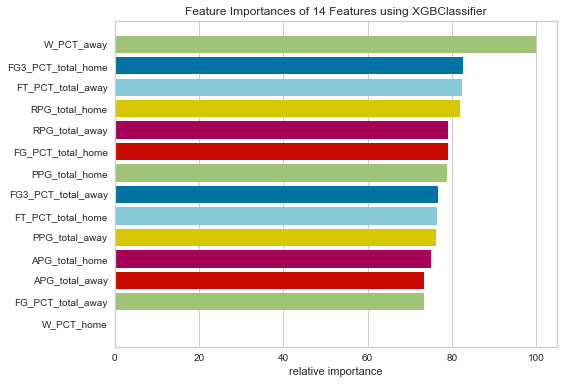

---------------------------------------------
Mean accuracy: 0.5885565269161517
Max accuracy: 0.601470202152796
Min accuracy: 0.568241469816273
i=5
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 4}): 0.53
              precision    recall  f1-score   support

           0       0.64      0.14      0.24      1777
           1       0.52      0.92      0.66      1777

    accuracy                           0.53      3554
   macro avg       0.58      0.53      0.45      3554
weighted avg       0.58      0.53      0.45      3554



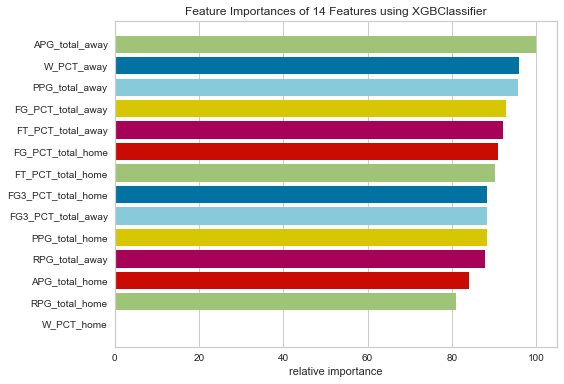

---------------------------------------------
i=6
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.55
              precision    recall  f1-score   support

           0       0.62      0.27      0.38      1795
           1       0.53      0.83      0.65      1759

    accuracy                           0.55      3554
   macro avg       0.58      0.55      0.51      3554
weighted avg       0.58      0.55      0.51      3554



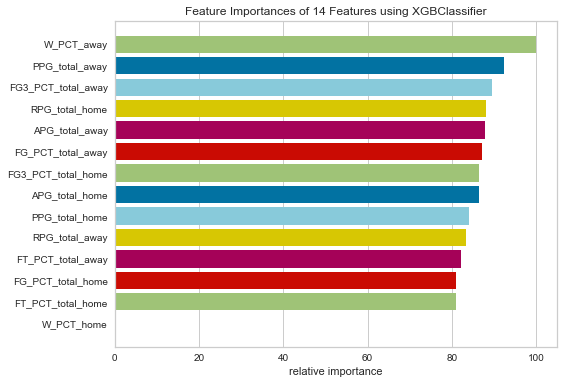

---------------------------------------------
i=7
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 6}): 0.53
              precision    recall  f1-score   support

           0       0.67      0.11      0.19      1785
           1       0.51      0.94      0.66      1769

    accuracy                           0.53      3554
   macro avg       0.59      0.53      0.43      3554
weighted avg       0.59      0.53      0.43      3554



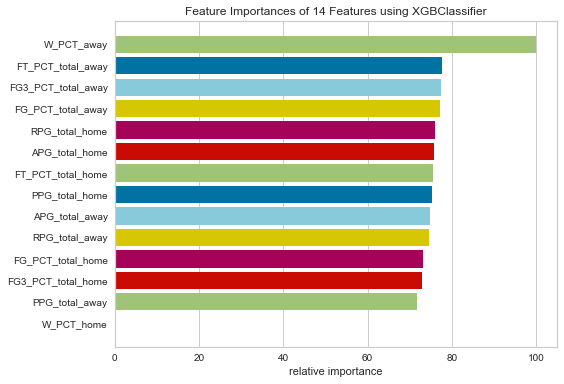

---------------------------------------------
i=8
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 5}): 0.55
              precision    recall  f1-score   support

           0       0.69      0.14      0.24      1743
           1       0.53      0.94      0.68      1810

    accuracy                           0.55      3553
   macro avg       0.61      0.54      0.46      3553
weighted avg       0.61      0.55      0.46      3553



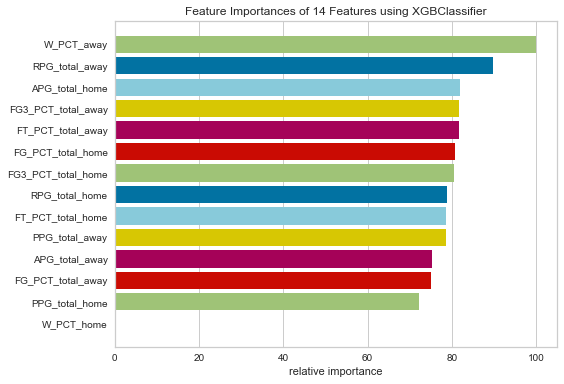

---------------------------------------------
i=9
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 4}): 0.53
              precision    recall  f1-score   support

           0       0.65      0.16      0.25      1784
           1       0.52      0.91      0.66      1769

    accuracy                           0.53      3553
   macro avg       0.58      0.54      0.46      3553
weighted avg       0.58      0.53      0.46      3553



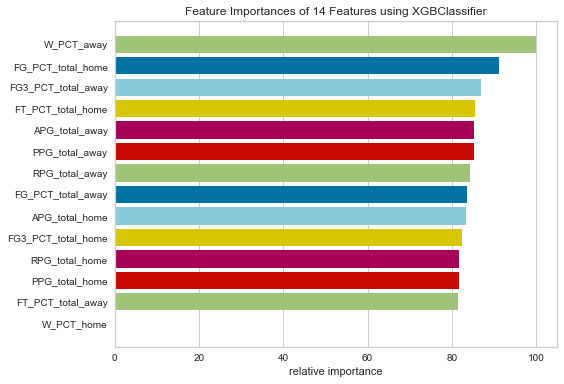

---------------------------------------------
Mean accuracy: 0.5389384180163679
Max accuracy: 0.5492402926280248
Min accuracy: 0.5256049521665729
i=10
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 4}): 0.50
              precision    recall  f1-score   support

           0       0.55      0.11      0.18      1655
           1       0.50      0.91      0.64      1605

    accuracy                           0.50      3260
   macro avg       0.52      0.51      0.41      3260
weighted avg       0.53      0.50      0.41      3260



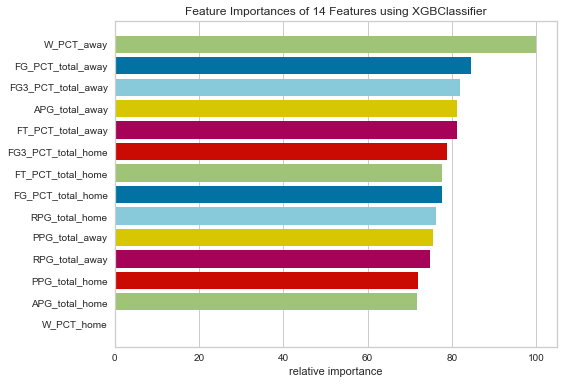

---------------------------------------------
i=11
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 4}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.10      0.17      1581
           1       0.52      0.90      0.66      1678

    accuracy                           0.51      3259
   macro avg       0.51      0.50      0.41      3259
weighted avg       0.51      0.51      0.42      3259



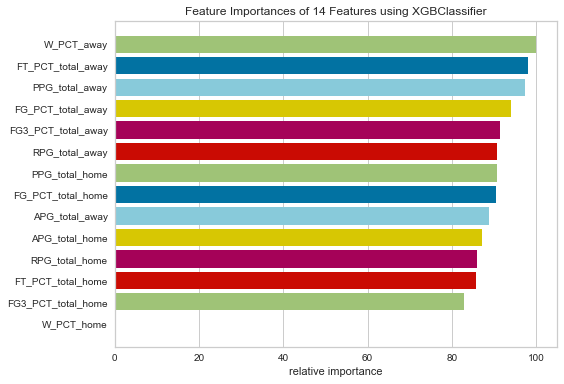

---------------------------------------------
i=12
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.50
              precision    recall  f1-score   support

           0       0.53      0.19      0.28      1667
           1       0.49      0.82      0.62      1592

    accuracy                           0.50      3259
   macro avg       0.51      0.51      0.45      3259
weighted avg       0.51      0.50      0.45      3259



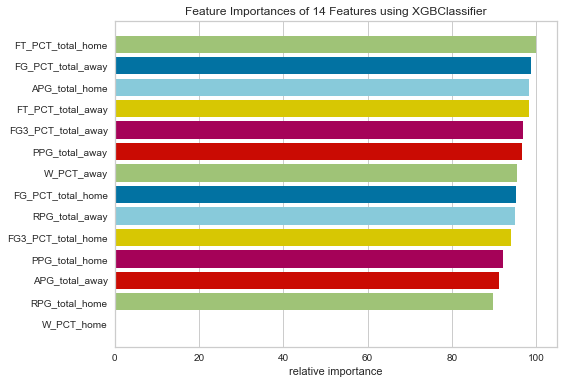

---------------------------------------------
i=13
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      1618
           1       0.50      0.49      0.50      1641

    accuracy                           0.50      3259
   macro avg       0.50      0.50      0.50      3259
weighted avg       0.50      0.50      0.50      3259



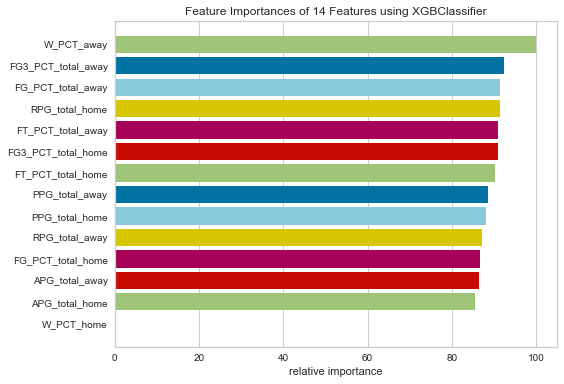

---------------------------------------------
i=14
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1627
           1       0.50      0.48      0.49      1632

    accuracy                           0.50      3259
   macro avg       0.50      0.50      0.50      3259
weighted avg       0.50      0.50      0.50      3259



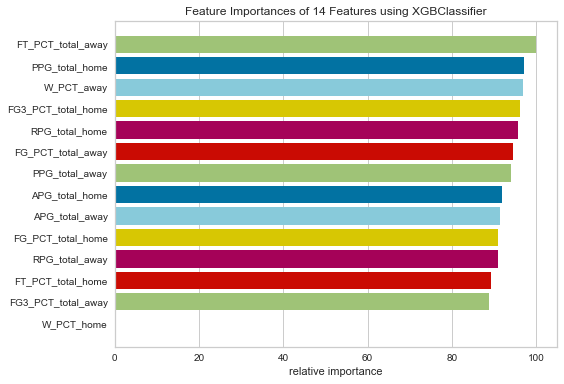

---------------------------------------------
Mean accuracy: 0.5037969652703133
Max accuracy: 0.5142681804234428
Min accuracy: 0.49861920834611845
i=15
FT:

Best XGBoost accuracy ({'scale_pos_weight': 3}): 0.50
              precision    recall  f1-score   support

           0       0.53      0.14      0.22      1654
           1       0.49      0.87      0.63      1585

    accuracy                           0.50      3239
   macro avg       0.51      0.50      0.42      3239
weighted avg       0.51      0.50      0.42      3239



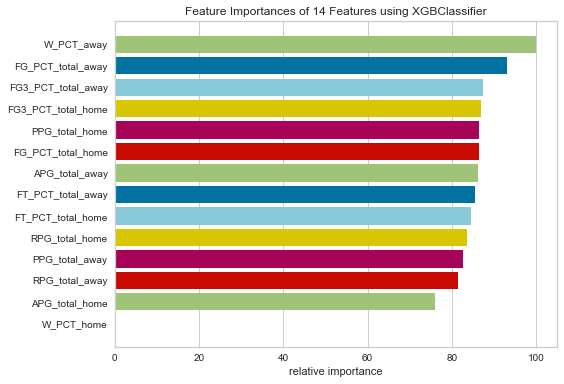

---------------------------------------------
i=16
FT:

Best XGBoost accuracy ({'scale_pos_weight': 26}): 0.50
              precision    recall  f1-score   support

           0       0.49      0.05      0.08      1604
           1       0.50      0.95      0.66      1635

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.37      3239
weighted avg       0.50      0.50      0.37      3239



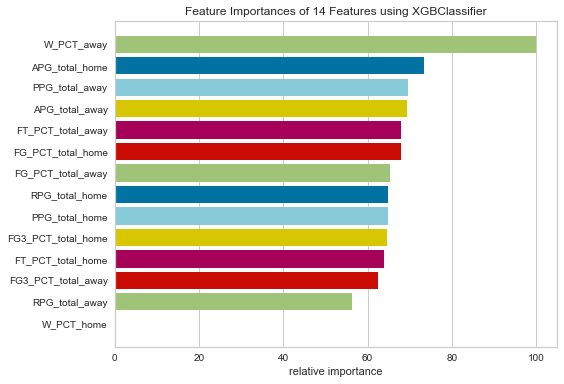

---------------------------------------------
i=17
FT:

Best XGBoost accuracy ({'scale_pos_weight': 19}): 0.49
              precision    recall  f1-score   support

           0       0.49      0.04      0.07      1647
           1       0.49      0.96      0.65      1591

    accuracy                           0.49      3238
   macro avg       0.49      0.50      0.36      3238
weighted avg       0.49      0.49      0.36      3238



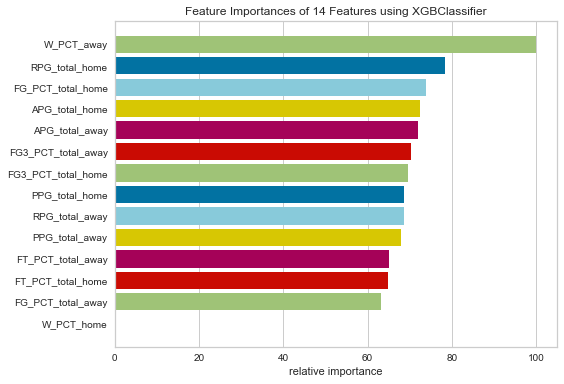

---------------------------------------------
i=18
FT:

Best XGBoost accuracy ({'scale_pos_weight': 4}): 0.51
              precision    recall  f1-score   support

           0       0.54      0.11      0.18      1625
           1       0.50      0.91      0.65      1613

    accuracy                           0.51      3238
   macro avg       0.52      0.51      0.41      3238
weighted avg       0.52      0.51      0.41      3238



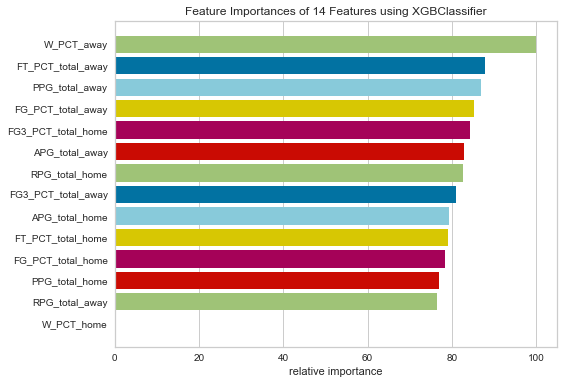

---------------------------------------------
i=19
FT:

Best XGBoost accuracy ({'scale_pos_weight': 25}): 0.52
              precision    recall  f1-score   support

           0       0.52      0.06      0.11      1566
           1       0.52      0.95      0.67      1672

    accuracy                           0.52      3238
   macro avg       0.52      0.50      0.39      3238
weighted avg       0.52      0.52      0.40      3238



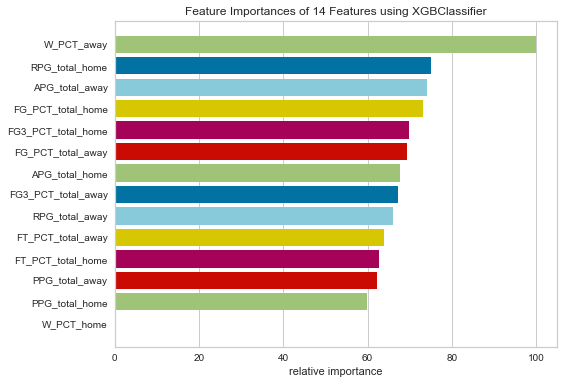

---------------------------------------------
Mean accuracy: 0.4991506388039072
Max accuracy: 0.5055589870290302
Min accuracy: 0.4901173563928351
i=20
AST:

Best XGBoost accuracy ({'scale_pos_weight': 5}): 0.51
              precision    recall  f1-score   support

           0       0.65      0.12      0.20      1810
           1       0.50      0.93      0.65      1706

    accuracy                           0.51      3516
   macro avg       0.57      0.52      0.43      3516
weighted avg       0.57      0.51      0.42      3516



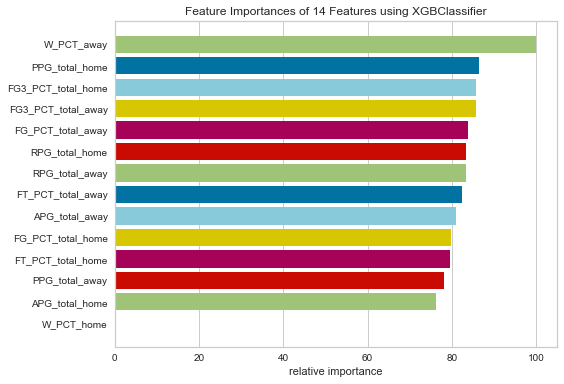

---------------------------------------------
i=21
AST:

Best XGBoost accuracy ({'scale_pos_weight': 3}): 0.53
              precision    recall  f1-score   support

           0       0.65      0.16      0.26      1793
           1       0.51      0.91      0.65      1722

    accuracy                           0.53      3515
   macro avg       0.58      0.53      0.46      3515
weighted avg       0.58      0.53      0.45      3515



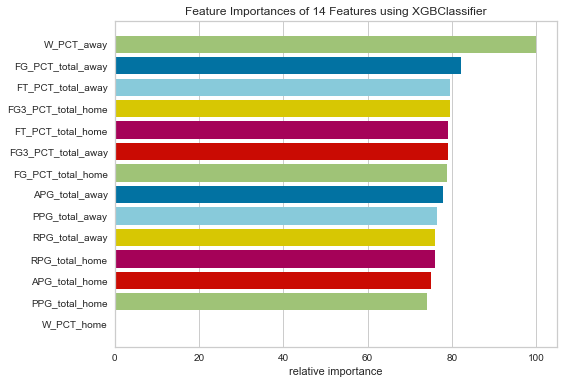

---------------------------------------------
i=22
AST:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.57      0.57      1750
           1       0.57      0.56      0.56      1765

    accuracy                           0.56      3515
   macro avg       0.56      0.56      0.56      3515
weighted avg       0.56      0.56      0.56      3515



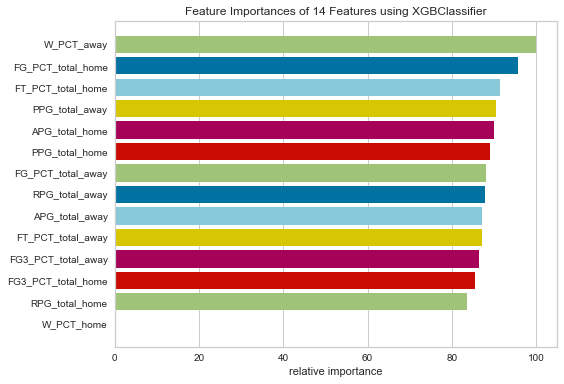

---------------------------------------------
i=23
AST:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.55
              precision    recall  f1-score   support

           0       0.53      0.58      0.55      1720
           1       0.56      0.52      0.54      1795

    accuracy                           0.55      3515
   macro avg       0.55      0.55      0.55      3515
weighted avg       0.55      0.55      0.55      3515



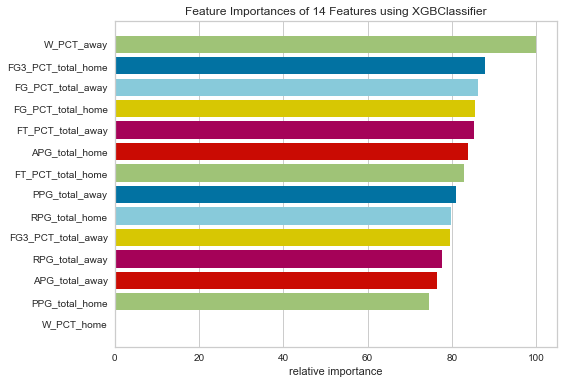

---------------------------------------------
i=24
AST:

Best XGBoost accuracy ({'scale_pos_weight': 3}): 0.54
              precision    recall  f1-score   support

           0       0.59      0.18      0.27      1715
           1       0.53      0.88      0.66      1800

    accuracy                           0.54      3515
   macro avg       0.56      0.53      0.47      3515
weighted avg       0.56      0.54      0.47      3515



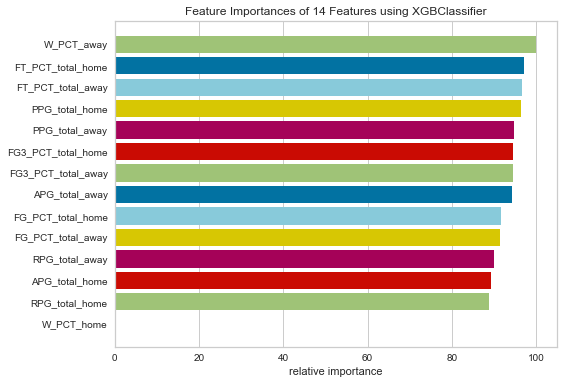

---------------------------------------------
Mean accuracy: 0.5373034993858596
Max accuracy: 0.5633001422475107
Min accuracy: 0.5127986348122867
i=25
REB:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.54
              precision    recall  f1-score   support

           0       0.60      0.27      0.37      1739
           1       0.52      0.82      0.63      1682

    accuracy                           0.54      3421
   macro avg       0.56      0.54      0.50      3421
weighted avg       0.56      0.54      0.50      3421



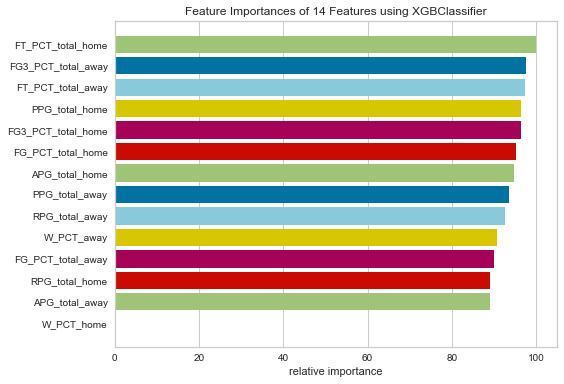

---------------------------------------------
i=26
REB:

Best XGBoost accuracy ({'scale_pos_weight': 3}): 0.52
              precision    recall  f1-score   support

           0       0.59      0.16      0.26      1725
           1       0.51      0.89      0.65      1696

    accuracy                           0.52      3421
   macro avg       0.55      0.52      0.45      3421
weighted avg       0.55      0.52      0.45      3421



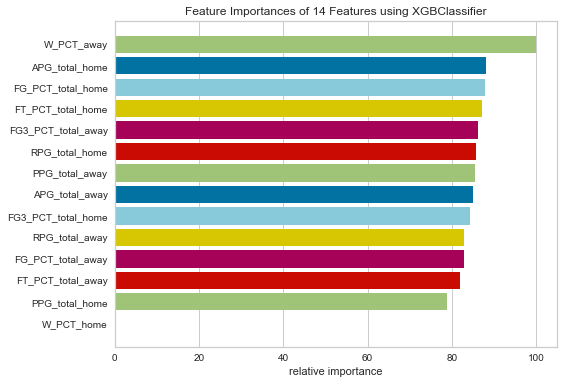

---------------------------------------------
i=27
REB:

Best XGBoost accuracy ({'scale_pos_weight': 3}): 0.53
              precision    recall  f1-score   support

           0       0.59      0.18      0.27      1710
           1       0.52      0.88      0.65      1711

    accuracy                           0.53      3421
   macro avg       0.56      0.53      0.46      3421
weighted avg       0.56      0.53      0.46      3421



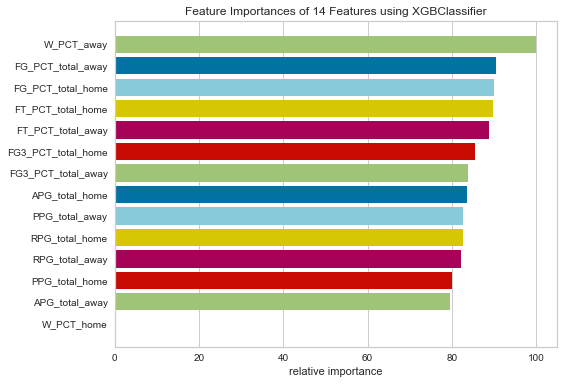

---------------------------------------------
i=28
REB:

Best XGBoost accuracy ({'scale_pos_weight': 1}): 0.53
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      1668
           1       0.55      0.52      0.53      1753

    accuracy                           0.53      3421
   macro avg       0.53      0.53      0.53      3421
weighted avg       0.53      0.53      0.53      3421



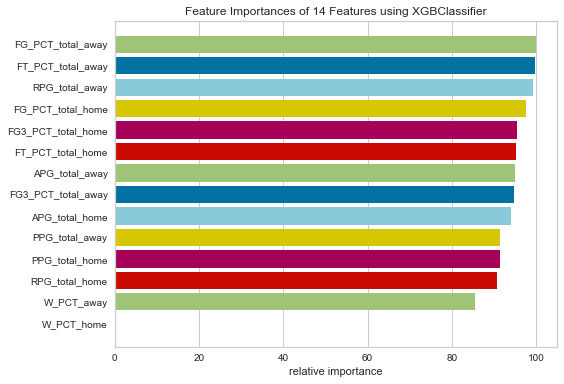

---------------------------------------------
i=29
REB:

Best XGBoost accuracy ({'scale_pos_weight': 2}): 0.54
              precision    recall  f1-score   support

           0       0.60      0.25      0.35      1710
           1       0.53      0.83      0.64      1710

    accuracy                           0.54      3420
   macro avg       0.56      0.54      0.50      3420
weighted avg       0.56      0.54      0.50      3420



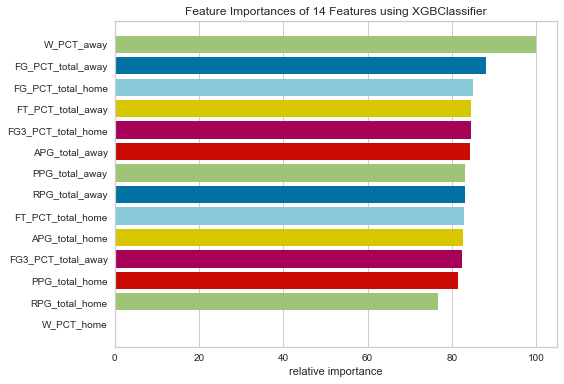

---------------------------------------------
Mean accuracy: 0.5299619994153757
Max accuracy: 0.5378544285296697
Min accuracy: 0.5217772581116633


In [33]:
# Control the balance of positive and negative weights, useful for unbalanced classes. 
# A typical value to consider: sum(negative instances) / sum(positive instances).

print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'scale_pos_weight' : [*range(0,30)],
})